# Home credit group analysis Part 2

This is a second part of data analysis on a Home Credit Group dataset. This part concentrates on exploratory data analysis on the preprocessed data. The main purpose of this part of the analysis is to investigate the suitable target features and gain better understating of the dataset.


Objectives 
1. conduct exploratory data analysis and gain understanding of the data. 
2. identify interesting target features 

Main research questions:
- What are suitable target features?
- Is there a pattern in data that can predict the identified target features?
- What are most important features for the predictions?

The main findings:

- The only target feature that is selected for model training is default risk of loan application.
- There is no clear pattern that can be identified from the dataset as the clients are not homogenous group and diverse significantly from each other.
- The most important factors to predict default risk are days employed, credit debt ratio, active credit overdue and organization and occupation type.


**Contents**

1. [Importing packages and data](#1.-Importing-packages-and-data)

2. [Exploratory data analysis](#2.-Exploratory-data-analysis)
    
    2.1 [Target feature](#2.1-Target-feature)
    
    2.2 [Descriptive statistics](#2.2-Descriptive-statistics)
    
    2.3 [Applicant's stability of income](#2.3-Applicant's-stability-of-income)
    
    2.4 [Applicant's financial commitment](#2.4-Applicant's-financial-commitment)
    
    2.5 [Applicant's application history](#2.5-Applicant's-application-history)
    
    2.7 [Credit history](#2.6-Credit-history)
    
    2.8 [Correlations](#2.8-Correlations)


3. [Conclusion](#3.-Conclusion)


***

## 1. Importing packages and data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sns.set(rc={"figure.figsize": (10, 6)})

In [2]:
%load_ext nb_black
%matplotlib inline

<IPython.core.display.Javascript object>

In [3]:
%load_ext autoreload
%autoreload 2
import edatools

<IPython.core.display.Javascript object>

In [4]:
df_eda = pd.read_csv(
    "../../../home-credit-default-risk/HomeCreditData_preprocessed.csv",
    index_col=False,
    encoding="utf-8'",
)

<IPython.core.display.Javascript object>

### 1.1 Database description

In [5]:
pd.set_option("display.max_rows", 800)
edatools.dataframe_info(df_eda)

Shape: (307503, 722)


DataType  #Nulls    %Nulls  \
TARGET                                                int64       0  0.000000   
CODE_GENDER_f                                         int64       0  0.000000   
FLAG_OWN_CAR_y                                        int64       0  0.000000   
FLAG_OWN_REALTY_y                                     int64       0  0.000000   
CNT_CHILDREN                                          int64       0  0.000000   
AMT_INCOME_TOTAL                                    float64       0  0.000000   
AMT_CREDIT                                          float64       0  0.000000   
AMT_ANNUITY                                         float64      12  0.000039   
AMT_GOODS_PRICE                                     float64     276  0.000898   
REGION_POPULATION_RELATIVE                          float64       0  0.000000   
DAYS_BIRTH                                            int64       0  0.000000   
DAYS_EMPLOYED                                       float64   55374  0.180076   
DAYS_ID_PUBLISH                                       int64       0  0.000000   
OWN_CAR_AGE                                         float64  202923  0.659906   
CNT_FAM_MEMBERS                                     float64       0  0.000000   
REGION_RATING_CLIENT                                  int64       0  0.000000   
REGION_RATING_CLIENT_W_CITY                           int64       0  0.000000   
REG_REGION_NOT_LIVE_REGION_1                          int64       0  0.000000   
REG_REGION_NOT_WORK_REGION_1                          int64       0  0.000000   
LIVE_REGION_NOT_WORK_REGION_1                         int64       0  0.000000   
REG_CITY_NOT_LIVE_CITY_1                              int64       0  0.000000   
REG_CITY_NOT_WORK_CITY_1                              int64       0  0.000000   
LIVE_CITY_NOT_WORK_CITY_1                             int64       0  0.000000   
EXT_SOURCE_1                                        float64  173375  0.563816   
EXT_SOURCE_2                                        float64     660  0.002146   
EXT_SOURCE_3                                        float64   60964  0.198255   
APARTMENTS_AVG                                      float64  156058  0.507501   
BASEMENTAREA_AVG                                    float64  179941  0.585168   
YEARS_BEGINEXPLUATATION_AVG                         float64  150005  0.487816   
YEARS_BUILD_AVG                                     float64  204484  0.664982   
COMMONAREA_AVG                                      float64  214859  0.698722   
ELEVATORS_AVG                                       float64  163889  0.532967   
ENTRANCES_AVG                                       float64  154826  0.503494   
FLOORSMAX_AVG                                       float64  153018  0.497615   
FLOORSMIN_AVG                                       float64  208638  0.678491   
LANDAREA_AVG                                        float64  182585  0.593767   
LIVINGAPARTMENTS_AVG                                float64  210195  0.683554   
LIVINGAREA_AVG                                      float64  154348  0.501940   
NONLIVINGAPARTMENTS_AVG                             float64  213509  0.694331   
NONLIVINGAREA_AVG                                   float64  169677  0.551790   
APARTMENTS_MODE                                     float64  156058  0.507501   
BASEMENTAREA_MODE                                   float64  179941  0.585168   
YEARS_BEGINEXPLUATATION_MODE                        float64  150005  0.487816   
YEARS_BUILD_MODE                                    float64  204484  0.664982   
COMMONAREA_MODE                                     float64  214859  0.698722   
ELEVATORS_MODE                                      float64  163889  0.532967   
ENTRANCES_MODE                                      float64  154826  0.503494   
FLOORSMAX_MODE                                      float64  153018  0.497615   
FLOORSMIN_MODE                                      float64  208638  0.678491   
L

<IPython.core.display.Javascript object>

In [6]:
pd.reset_option("display.max_rows")

<IPython.core.display.Javascript object>

In [7]:
numerical_features = df_eda.select_dtypes(include="float64").columns.tolist()
numerical_features.append("DAYS_BIRTH")
numerical_features.append("DAYS_ID_PUBLISH")
numerical_features.append("CNT_CHILDREN")
categorical_features = df_eda.columns[~df_eda.columns.isin(numerical_features)]

<IPython.core.display.Javascript object>

*** 

## 2. Exploratory data analysis

Here the exploratory data analysis is conducted for the aggregated dataset. The questions that are answered here are

- What are suitable target features?
- Is there a pattern in data that can predict the identified target features?
- What are most important features for the predictions?

As the dataset is large, the analysis concentrates on the most interesting features. These features are selected because they capture various financial, credit history, and personal factors of the borrower. Their relationships can be used to predict the loan default risk more accurately if possible. The different financial factors that are investigated are stability of income, financial commitment, previous applications and credit history. These features are investigated more thorougly against the identified target features.

### 2.1 Target feature

After initial investigation, one feature is identified as a suitable target feature for risk evaluation for retail banks. This feature *TARGET* describes the default risk of the borrower. If the client has had payment difficulties and late payments at least once *TARGET* is 1, and 0 for the rest.

Text(0.5, 1.0, 'Distribution of customers with repayment difficulties')

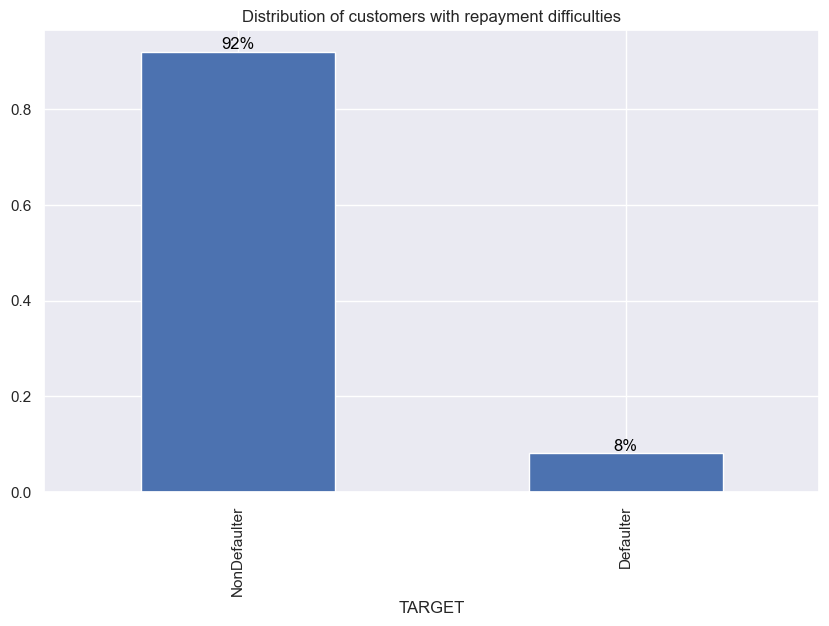

<IPython.core.display.Javascript object>

In [8]:
sns.set(rc={"figure.figsize": (10, 6)})
percentage = (df_eda["TARGET"].value_counts() / df_eda.shape[0]).rename(
    index={0: "NonDefaulter", 1: "Defaulter"}
)
ax = percentage.plot(kind="bar")
for container in ax.containers:
    ax.bar_label(container, padding=0, color="black", fmt="{:.0%}")
ax.set_title("Distribution of customers with repayment difficulties")

Target feature is imbalanced which need to be accounted in model training.

Next, other features are investigated against the target feature.

### 2.2 Descriptive statistics

In [9]:
round(df_eda[numerical_features].agg(["mean", "median", "std", "min", "max"]))

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
mean            168417.0    599030.0      27109.0         538399.0   
median          146997.0    513531.0      24903.0         450000.0   
std             108812.0    402494.0      14494.0         369448.0   
min              25650.0     45000.0       1616.0          40500.0   
max           18000090.0   4050000.0     258026.0        4050000.0   

        REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  OWN_CAR_AGE  \
mean                           0.0        -2384.0         12.0   
median                         0.0        -1648.0          9.0   
std                            0.0         2338.0         12.0   
min                            0.0       -17912.0          0.0   
max                            0.0            0.0         91.0   

        CNT_FAM_MEMBERS  EXT_SOURCE_1  EXT_SOURCE_2  ...  \
mean                2.0           1.0           1.0  ...   
median              2.0           1.0           1.0  ...   
std                 1.0           0.0           0.0  ...   
min                 1.0           0.0           0.0  ...   
max                20.0           1.0           1.0  ...   

        APPROVED__TOTAL_MISSING_RATIO  INSTAL__TOTAL_MISSING_RATIO  \
mean                              0.0                          0.0   
median                            0.0                          0.0   
std                               0.0                          0.0   
min                               0.0                          0.0   
max                               1.0                          1.0   

        CC__TOTAL_MISSING_RATIO  POS__TOTAL_MISSING_RATIO  \
mean                        1.0                       0.0   
median                      1.0                       0.0   
std                         0.0                       0.0   
min                         0.0                       0.0   
max                         1.0                       1.0   

        BURO__TOTAL_MISSING_RATIO  ACTIVE__TOTAL_MISSING_RATIO  \
mean                          0.0                          0.0   
median                        0.0                          0.0   
std                           0.0                          0.0   
min                           0.0                          0.0   
max                           1.0                          1.0   

        CLOSED__TOTAL_MISSING_RATIO  DAYS_BIRTH  DAYS_ID_PUBLISH  CNT_CHILDREN  
mean                            0.0    -16037.0          -2994.0           0.0  
median                          0.0    -15750.0          -3254.0           0.0  
std                             0.0      4364.0           1509.0           1.0  
min                             0.0    -25229.0          -7197.0           0.0  
max                             1.0     -7489.0              0.0          19.0  

[5 rows x 639 columns]

<IPython.core.display.Javascript object>

In [10]:
dfg = df_eda.groupby("TARGET")[numerical_features].agg(
    ["mean", "median", "std"]).T
dfg["Absolute Difference"] = dfg[1] - dfg[0]
dfg["Relative Difference"] = (dfg[1] - dfg[0]) / dfg[0]
round(dfg.T, 2)

AMT_INCOME_TOTAL                       AMT_CREDIT  \
                                mean     median        std       mean   
TARGET                                                                  
0                          169076.24  148500.00  110476.19  602652.46   
1                          160905.25  135000.00   87306.91  557778.34   
Absolute Difference         -8170.99  -13500.00  -23169.29  -44874.12   
Relative Difference            -0.05      -0.09      -0.21      -0.07   

                                          AMT_ANNUITY                      \
                        median        std        mean    median       std   
TARGET                                                                      
0                    517788.00  406849.27    27163.76  24876.00  14658.41   
1                    497520.00  346440.21    26481.76  25263.00  12450.93   
Absolute Difference  -20268.00  -60409.05     -682.00    387.00  -2207.48   
Relative Difference      -0.04      -0.15       -0.03      0.02     -0.15   

                    AMT_GOODS_PRICE  ... CLOSED__TOTAL_MISSING_RATIO  \
                               mean  ...                         std   
TARGET                               ...                               
0                         542739.79  ...                        0.37   
1                         488973.80  ...                        0.41   
Absolute Difference       -53765.99  ...                        0.03   
Relative Difference           -0.10  ...                        0.09   

                    DAYS_BIRTH                   DAYS_ID_PUBLISH           \
                          mean   median      std            mean   median   
TARGET                                                                      
0                    -16138.26 -15877.0  4364.19        -3017.22 -3295.00   
1                    -14884.92 -14282.0  4192.90        -2732.06 -2797.00   
Absolute Difference    1253.34   1595.0  -171.29          285.16   498.00   
Relative Difference      -0.08     -0.1    -0.04           -0.09    -0.15   

                             CNT_CHILDREN               
                         std         mean median   std  
TARGET                                                  
0                    1506.62         0.41    0.0  0.72  
1                    1516.99         0.46    0.0  0.76  
Absolute Difference    10.37         0.05    0.0  0.04  
Relative Difference     0.01         0.12    NaN  0.05  

[4 rows x 1917 columns]

<IPython.core.display.Javascript object>

Here the relatively largest differences between the two target groups are listed by mean and standard deviation.

In [11]:
dfg.loc[
    dfg.index.isin(
        [
            "mean",
        ],
        level=1,
    ),
    "Relative Difference",
].sort_values().head(10)

INSTAL_INST_PAYMENT_DIFFERENCE_MEAN    mean   -1.592600
CLOSED_AMT_CREDIT_DEBT_RATE_MEAN       mean   -1.003012
CC_NAME_CONTRACT_STATUS_Approved_MEAN  mean   -1.000000
CC_NAME_CONTRACT_STATUS_Approved_SUM   mean   -1.000000
APPROVED_FLAG_MISSING_ANNUITY_MAX      mean   -1.000000
APPROVED_FLAG_MISSING_ANNUITY_MEAN     mean   -1.000000
POS_NAME_CONTRACT_STATUS_XNA_SUM       mean   -1.000000
PREV_CODE_REJECT_REASON_SYSTEM_SUM     mean   -1.000000
PREV_CODE_REJECT_REASON_SYSTEM_MEAN    mean   -1.000000
POS_NAME_CONTRACT_STATUS_XNA_MEAN      mean   -1.000000
Name: Relative Difference, dtype: float64

<IPython.core.display.Javascript object>

In [12]:
dfg.loc[
    dfg.index.isin(
        [
            "std",
        ],
        level=1,
    ),
    "Relative Difference",
].sort_values().head(10)

CC_NAME_CONTRACT_STATUS_Approved_MEAN  std   -1.0
PREV_CODE_REJECT_REASON_SYSTEM_MEAN    std   -1.0
PREV_CODE_REJECT_REASON_SYSTEM_SUM     std   -1.0
CC_NAME_CONTRACT_STATUS_Approved_SUM   std   -1.0
POS_NAME_CONTRACT_STATUS_XNA_SUM       std   -1.0
APPROVED_FLAG_MISSING_ANNUITY_MEAN     std   -1.0
APPROVED_FLAG_MISSING_ANNUITY_MAX      std   -1.0
POS_NAME_CONTRACT_STATUS_XNA_MEAN      std   -1.0
BURO_CREDIT_CURRENCY_currency_3_MEAN   std   -1.0
BURO_CREDIT_CURRENCY_currency_3_SUM    std   -1.0
Name: Relative Difference, dtype: float64

<IPython.core.display.Javascript object>

### 2.3 Applicant's stability of income

Here the stability of the client's income is investigated with the selected features.

In [13]:
stab_inc_num = [
    "DAYS_EMPLOYED",
    "CNT_CHILDREN",
]

stab_inc_cat = [
    "FLAG_OWN_REALTY_y",
    "FLAG_OWN_CAR_y",
]

stab_inc_onehotenc = ["ORGANIZATION_TYPE",
                      "OCCUPATION_TYPE", "NAME_FAMILY_STATUS"]

<IPython.core.display.Javascript object>

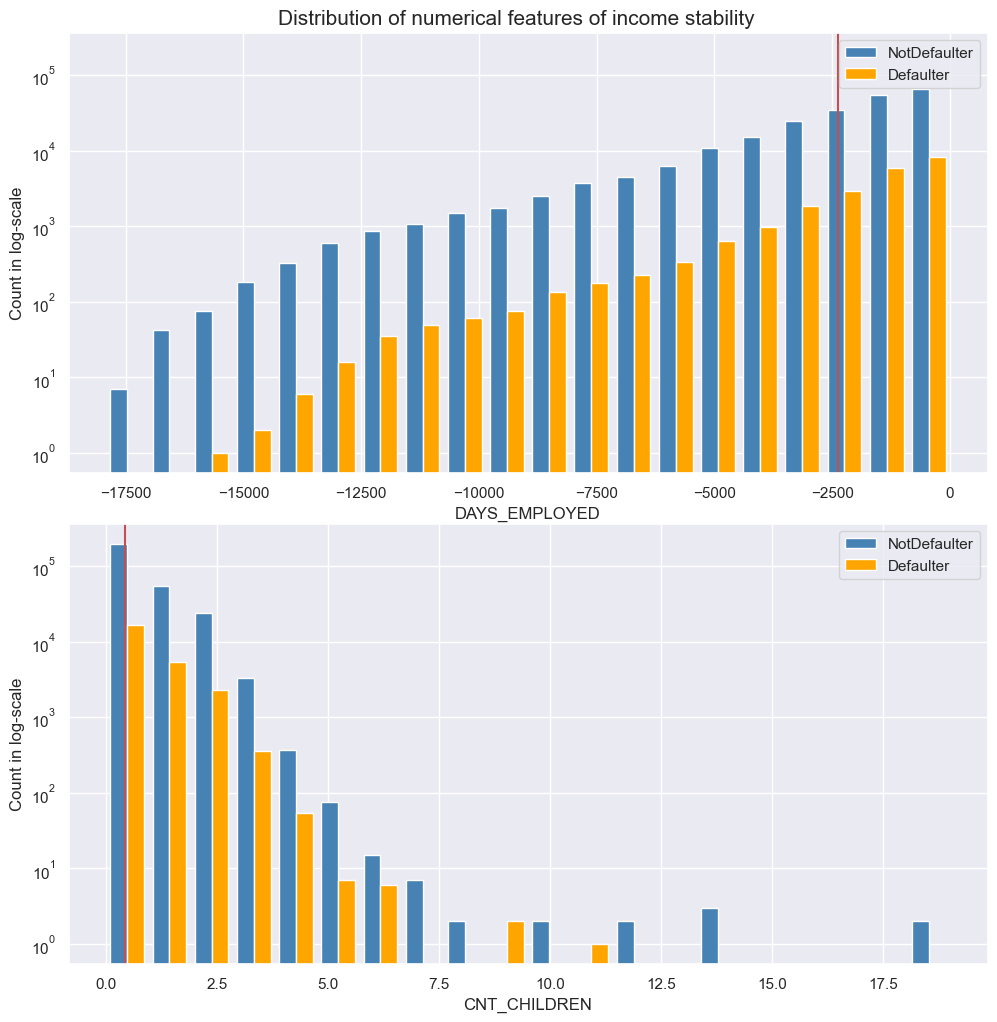

<IPython.core.display.Javascript object>

In [14]:
df = df_eda
features = stab_inc_num
target = "TARGET"
fig, axis = plt.subplots(len(features), 1, figsize=(10, 10), sharey=True)
plt.tight_layout()
plt.suptitle(
    "Distribution of numerical features of income stability", fontsize=15, y=1)
for n, col, ax in zip(range(len(features)), features, axis.flatten()):
    fdg1 = df.loc[df[target] == 1, col]
    fdg0 = df.loc[df[target] == 0, col]
    ax.hist(
        [fdg0, fdg1],
        bins=20,
        histtype="bar",
        color=["steelblue", "orange"],
        label=["NotDefaulter", "Defaulter"],
    )
    ax.set_ylabel("Count in log-scale")
    ax.set_yscale("log")
    ax.set_xlabel(col)
    ax.legend()
    ax.axvline(x=np.mean(df[col]), c="r")

The number of children does not show clear influence to the client's default risk. However, the days employed shows clearly that the risk of default decreases as the length of employment increases. For clients that have worked more than 15000 days did not have any defaults.

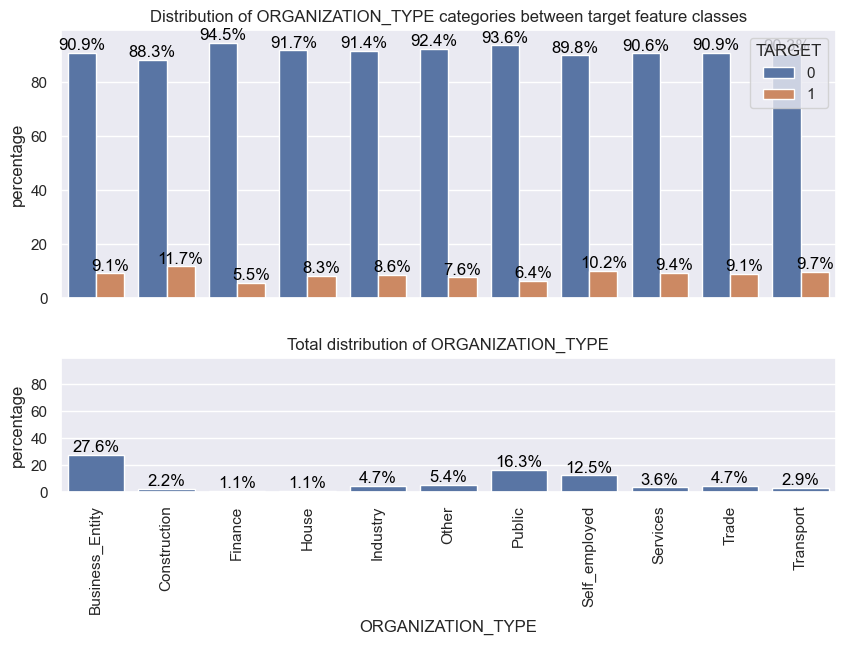

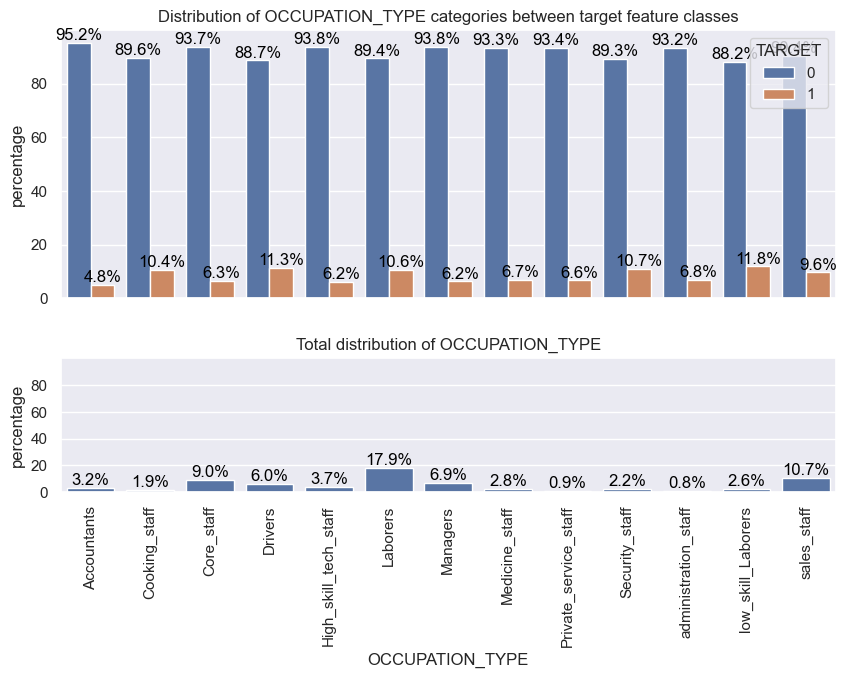

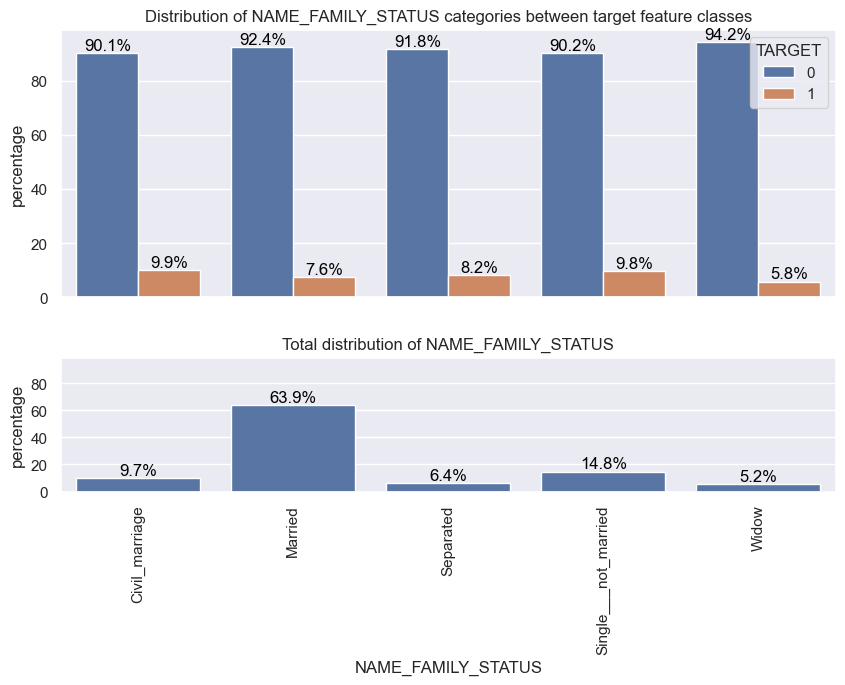

<IPython.core.display.Javascript object>

In [15]:
features = stab_inc_onehotenc
df = df_eda
target = "TARGET"
curr_palette = sns.color_palette()

for col in features:
    one_hot_encoded_categories = []
    for c in df_eda.columns.tolist():
        if col in c:
            one_hot_encoded_categories.append(c)
    cat_mapping = {}
    for cat in one_hot_encoded_categories:
        cat_mapping[cat] = cat[len(col) + 1:]
    grouped_data = (
        df_eda.groupby("TARGET")[one_hot_encoded_categories]
        .sum()
        .rename(columns=cat_mapping)
    )

    fig, axs = plt.subplots(
        2, 1, gridspec_kw={"height_ratios": [4, 2]}, sharex=True, sharey=True
    )
    plt.subplots_adjust(hspace=0.3, wspace=0.15)
    col_counts = grouped_data.sum()
    col_percentage = (100 * col_counts / df.shape[0]).rename("percentage")
    col_target_counts = grouped_data.unstack().unstack()
    col_target_percentage = col_target_counts.div(col_counts, axis=0) * 100
    col_target_percentage = col_target_percentage.reset_index().rename(
        columns={"index": col}
    )
    col_target_percentage = col_target_percentage.melt(
        id_vars=col, var_name=target, value_name="percentage"
    )
    col_target_percentage.pipe(
        (sns.barplot, "data"), x=col, y="percentage", hue=target, ax=axs[0]
    )
    col_percentage = col_percentage.reset_index().rename(columns={
        "index": col})
    col_percentage.pipe(
        (sns.barplot, "data"), x=col, y="percentage", ax=axs[1], color=curr_palette[0]
    )
    for container in axs[0].containers:
        axs[0].bar_label(container, padding=0, color="black", fmt="{:.1f}%")
    for container in axs[1].containers:
        axs[1].bar_label(container, padding=0, color="black", fmt="{:.1f}%")
    axs[0].set_xlabel("")
    axs[1].tick_params("x", labelrotation=90)
    axs[0].set_title(
        f"Distribution of {col} categories between target feature classes")
    axs[1].set_title(f"Total distribution of {col}")

There is a lot of scattering between different categories. It can be conclude that the occupation types that are valued higher such as accountants, managers, high skill it staff and so on are less risky customers. Clients that are working in "low skill" jobs seem to have higher risk of default. Similar finding can be made from organization types. Self-emploed clients are more risky, but clients that are working in the public sector or finance are less risky.

From the family status, it is harder to make conclusion as the distribution is more skewed and the differences smaller.

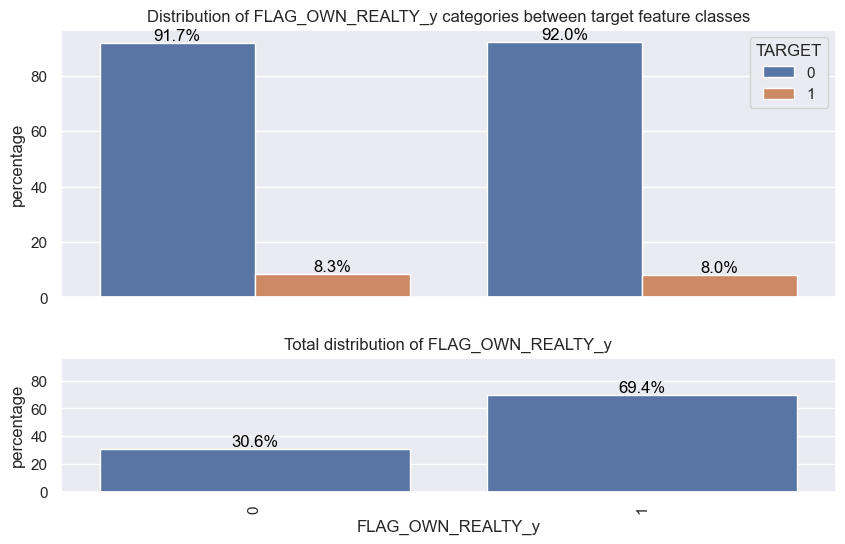

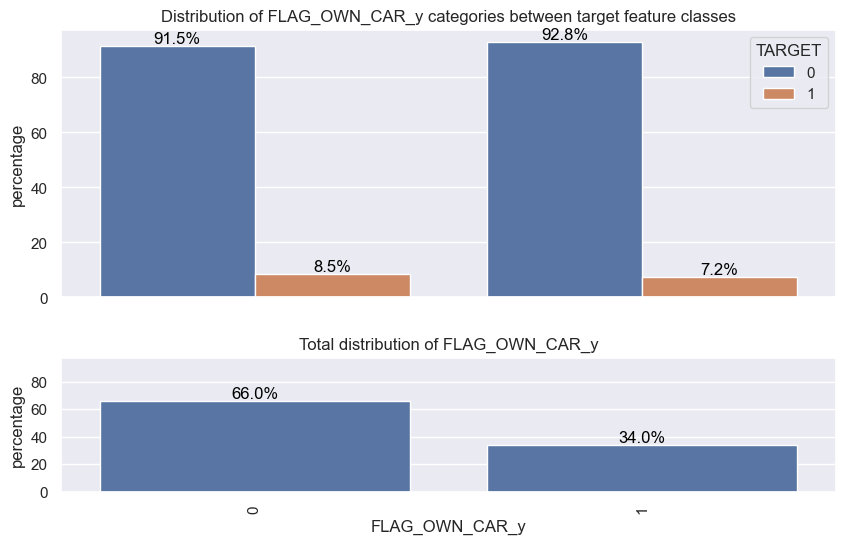

<IPython.core.display.Javascript object>

In [16]:
features = stab_inc_cat
df = df_eda
target = "TARGET"
curr_palette = sns.color_palette()

for col in features:
    fig, axs = plt.subplots(
        2, 1, gridspec_kw={"height_ratios": [4, 2]}, sharex=True, sharey=True
    )
    plt.subplots_adjust(hspace=0.3, wspace=0.15)
    col_counts = df[col].value_counts()
    col_percentage = (100 * col_counts / df.shape[0]).rename("percentage")
    col_target_counts = df.groupby([col, target]).size().unstack()
    col_target_percentage = col_target_counts.div(col_counts, axis=0) * 100
    col_target_percentage = col_target_percentage.reset_index().rename(
        columns={"index": col}
    )
    col_target_percentage = col_target_percentage.melt(
        id_vars=col, var_name=target, value_name="percentage"
    )
    col_target_percentage.pipe(
        (sns.barplot, "data"), x=col, y="percentage", hue=target, ax=axs[0]
    )
    col_percentage = col_percentage.reset_index().rename(columns={
        "index": col})
    col_percentage.pipe(
        (sns.barplot, "data"), x=col, y="percentage", ax=axs[1], color=curr_palette[0]
    )
    for container in axs[0].containers:
        axs[0].bar_label(container, padding=0, color="black", fmt="{:.1f}%")
    for container in axs[1].containers:
        axs[1].bar_label(container, padding=0, color="black", fmt="{:.1f}%")
    axs[0].set_xlabel("")
    axs[1].tick_params("x", labelrotation=90)
    axs[0].set_title(
        f"Distribution of {col} categories between target feature classes")
    axs[1].set_title(f"Total distribution of {col}")

Owning property does not show clear influence on the target features. There is small difference between the groups. Clients who owned a car or a apartment are slightly less risky to default the loan.

### 2.4 Applicant's financial commitment

Here the features that describe the commitment of the client to the loan are investigated.

In [17]:
fin_com_num = [
    "AMT_INCOME_TOTAL",
    "AMT_CREDIT",
    "AMT_ANNUITY",
    "AMT_GOODS_PRICE",
    "OBS_30_CNT_SOCIAL_CIRCLE",
    "OBS_60_CNT_SOCIAL_CIRCLE",
]

fin_com_cat = ["NAME_CONTRACT_TYPE"]

<IPython.core.display.Javascript object>

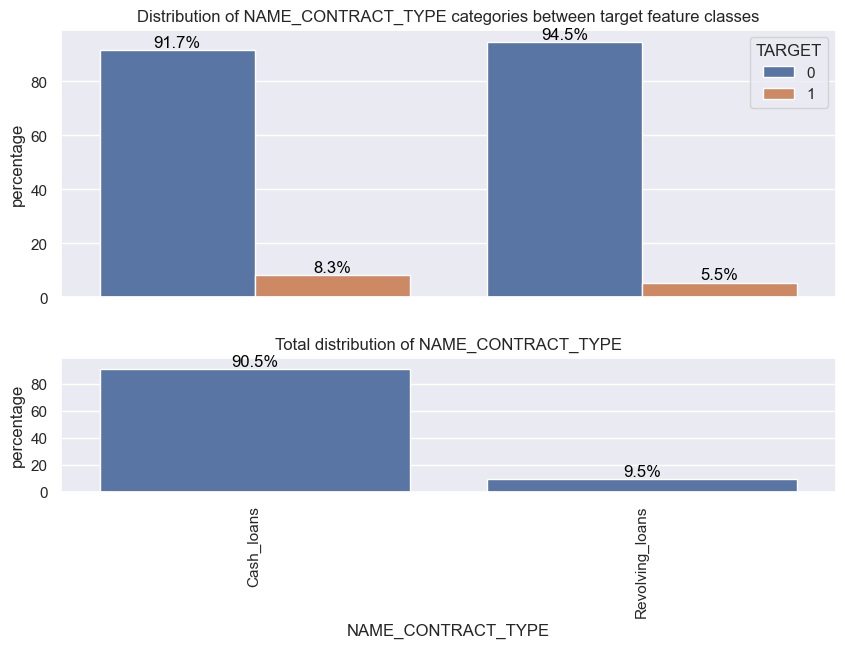

<IPython.core.display.Javascript object>

In [18]:
features = fin_com_cat
df = df_eda
target = "TARGET"
curr_palette = sns.color_palette()

for col in features:
    one_hot_encoded_categories = []
    for c in df_eda.columns.tolist():
        if col in c and "PREV" not in c:
            one_hot_encoded_categories.append(c)
    cat_mapping = {}
    for cat in one_hot_encoded_categories:
        cat_mapping[cat] = cat[len(col) + 1:]
    grouped_data = (
        df_eda.groupby("TARGET")[one_hot_encoded_categories]
        .sum()
        .rename(columns=cat_mapping)
    )

    fig, axs = plt.subplots(
        2, 1, gridspec_kw={"height_ratios": [4, 2]}, sharex=True, sharey=True
    )
    plt.subplots_adjust(hspace=0.3, wspace=0.15)
    col_counts = grouped_data.sum()
    col_percentage = (100 * col_counts / df.shape[0]).rename("percentage")
    col_target_counts = grouped_data.unstack().unstack()
    col_target_percentage = col_target_counts.div(col_counts, axis=0) * 100
    col_target_percentage = col_target_percentage.reset_index().rename(
        columns={"index": col}
    )
    col_target_percentage = col_target_percentage.melt(
        id_vars=col, var_name=target, value_name="percentage"
    )
    col_target_percentage.pipe(
        (sns.barplot, "data"), x=col, y="percentage", hue=target, ax=axs[0]
    )
    col_percentage = col_percentage.reset_index().rename(columns={
        "index": col})
    col_percentage.pipe(
        (sns.barplot, "data"), x=col, y="percentage", ax=axs[1], color=curr_palette[0]
    )
    for container in axs[0].containers:
        axs[0].bar_label(container, padding=0, color="black", fmt="{:.1f}%")
    for container in axs[1].containers:
        axs[1].bar_label(container, padding=0, color="black", fmt="{:.1f}%")
    axs[0].set_xlabel("")
    axs[1].tick_params("x", labelrotation=90)
    axs[0].set_title(
        f"Distribution of {col} categories between target feature classes")
    axs[1].set_title(f"Total distribution of {col}")

It seems that the cash loans is the most popular product. In addition, clients that took revolving loans did have much less difficulties in paying back the loan than clients that had cash loans.

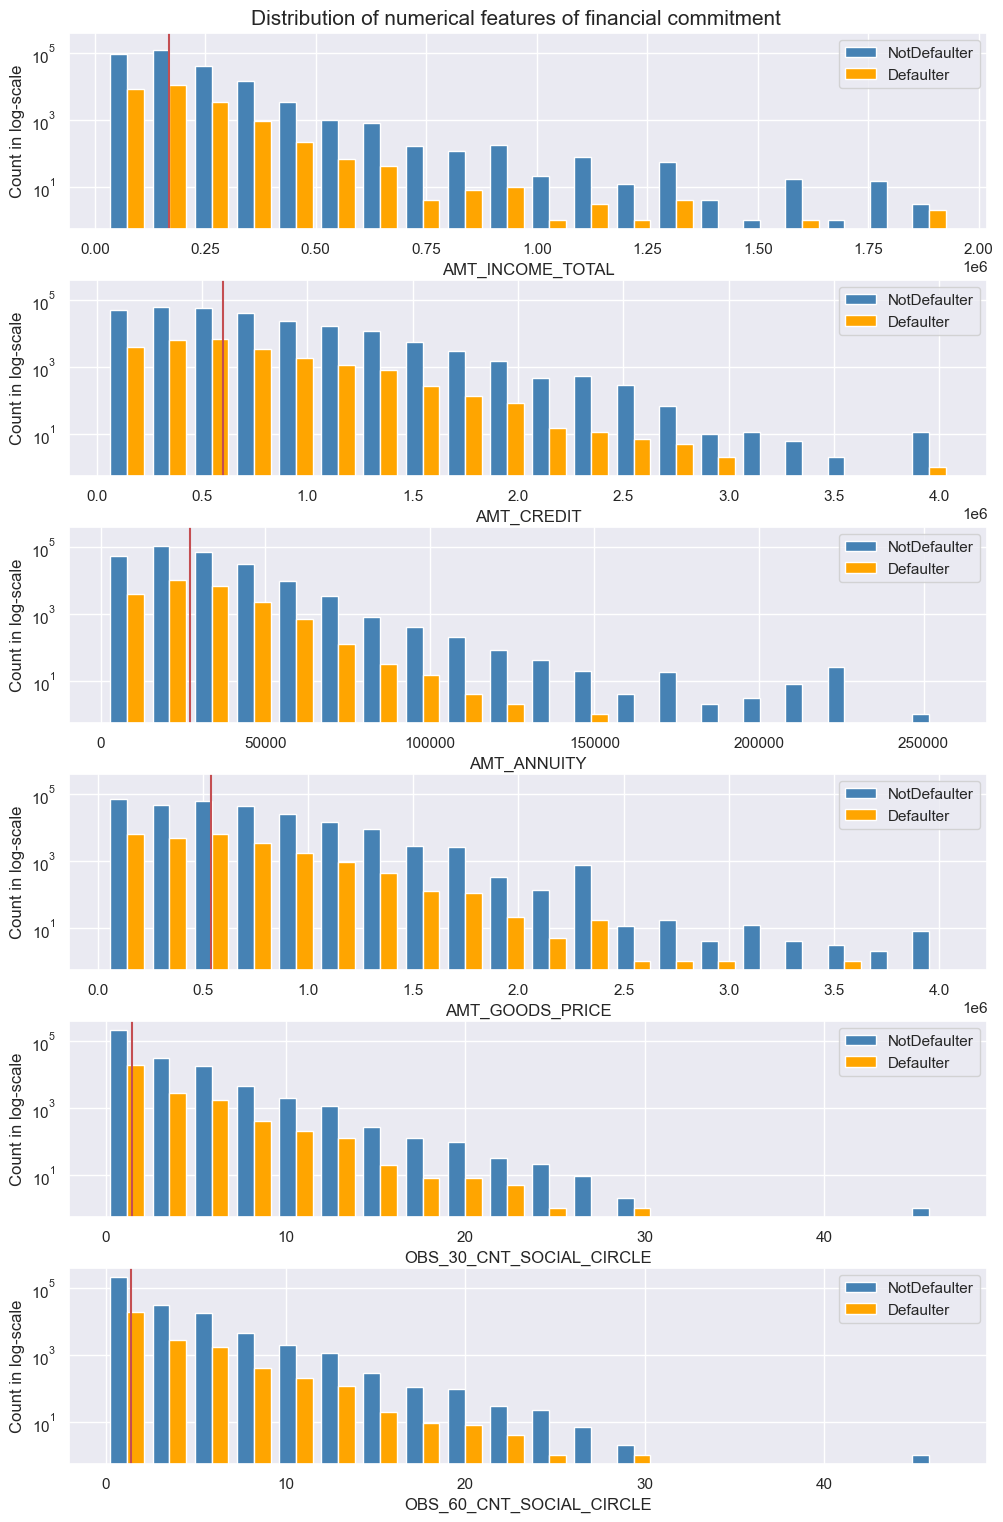

<IPython.core.display.Javascript object>

In [19]:
df = df_eda
features = fin_com_num
target = "TARGET"
fig, axis = plt.subplots(
    len(features), 1, figsize=(10, 2.5 * len(features)), sharey=True
)
plt.tight_layout()
plt.suptitle(
    "Distribution of numerical features of financial commitment", fontsize=15, y=1
)
for n, col, ax in zip(range(len(features)), features, axis.flatten()):
    if col == "AMT_INCOME_TOTAL":
        df = df[df[col] < 2000000]
    else:
        df = df_eda
    fdg1 = df.loc[df[target] == 1, col]
    fdg0 = df.loc[df[target] == 0, col]
    ax.hist(
        [fdg0, fdg1],
        bins=20,
        histtype="bar",
        color=["steelblue", "orange"],
        label=["NotDefaulter", "Defaulter"],
    )
    ax.set_ylabel("Count in log-scale")
    ax.set_yscale("log")
    ax.set_xlabel(col)
    ax.legend()
    ax.axvline(x=np.mean(df[col]), c="r")

There are some moderate trends that can be identified. For example, when the annual income increases close to one million, the ratio of defaulters starts to decrease. In addition, good price seems to follow similar trend. In the amount of credit and annuity these trends can be also seen but are much weaker. These could be also due to the fact that higher amount of credit and annuity usually means higher annual incomes.

### 2.5 Applicant's application history

Here the impact of previous applications of the client's income is investigated.

In [20]:
prev_applications = [
    "PREV_INTEREST_RATIO_MEAN",
    "PREV_INTEREST_RATIO_MAX",
    "PREV_REFUSED_APPLICATION_1_SUM",
    "PREV_AMT_REFUSED_MEAN",
    "PREV_NAME_CONTRACT_TYPE_Cash_loans_SUM",
    "PREV_NAME_CONTRACT_TYPE_Consumer_loans_SUM",
    "PREV_NAME_CONTRACT_TYPE_Revolving_loans_SUM",
    "PREV_NAME_PRODUCT_TYPE_x_sell_SUM",
]

<IPython.core.display.Javascript object>

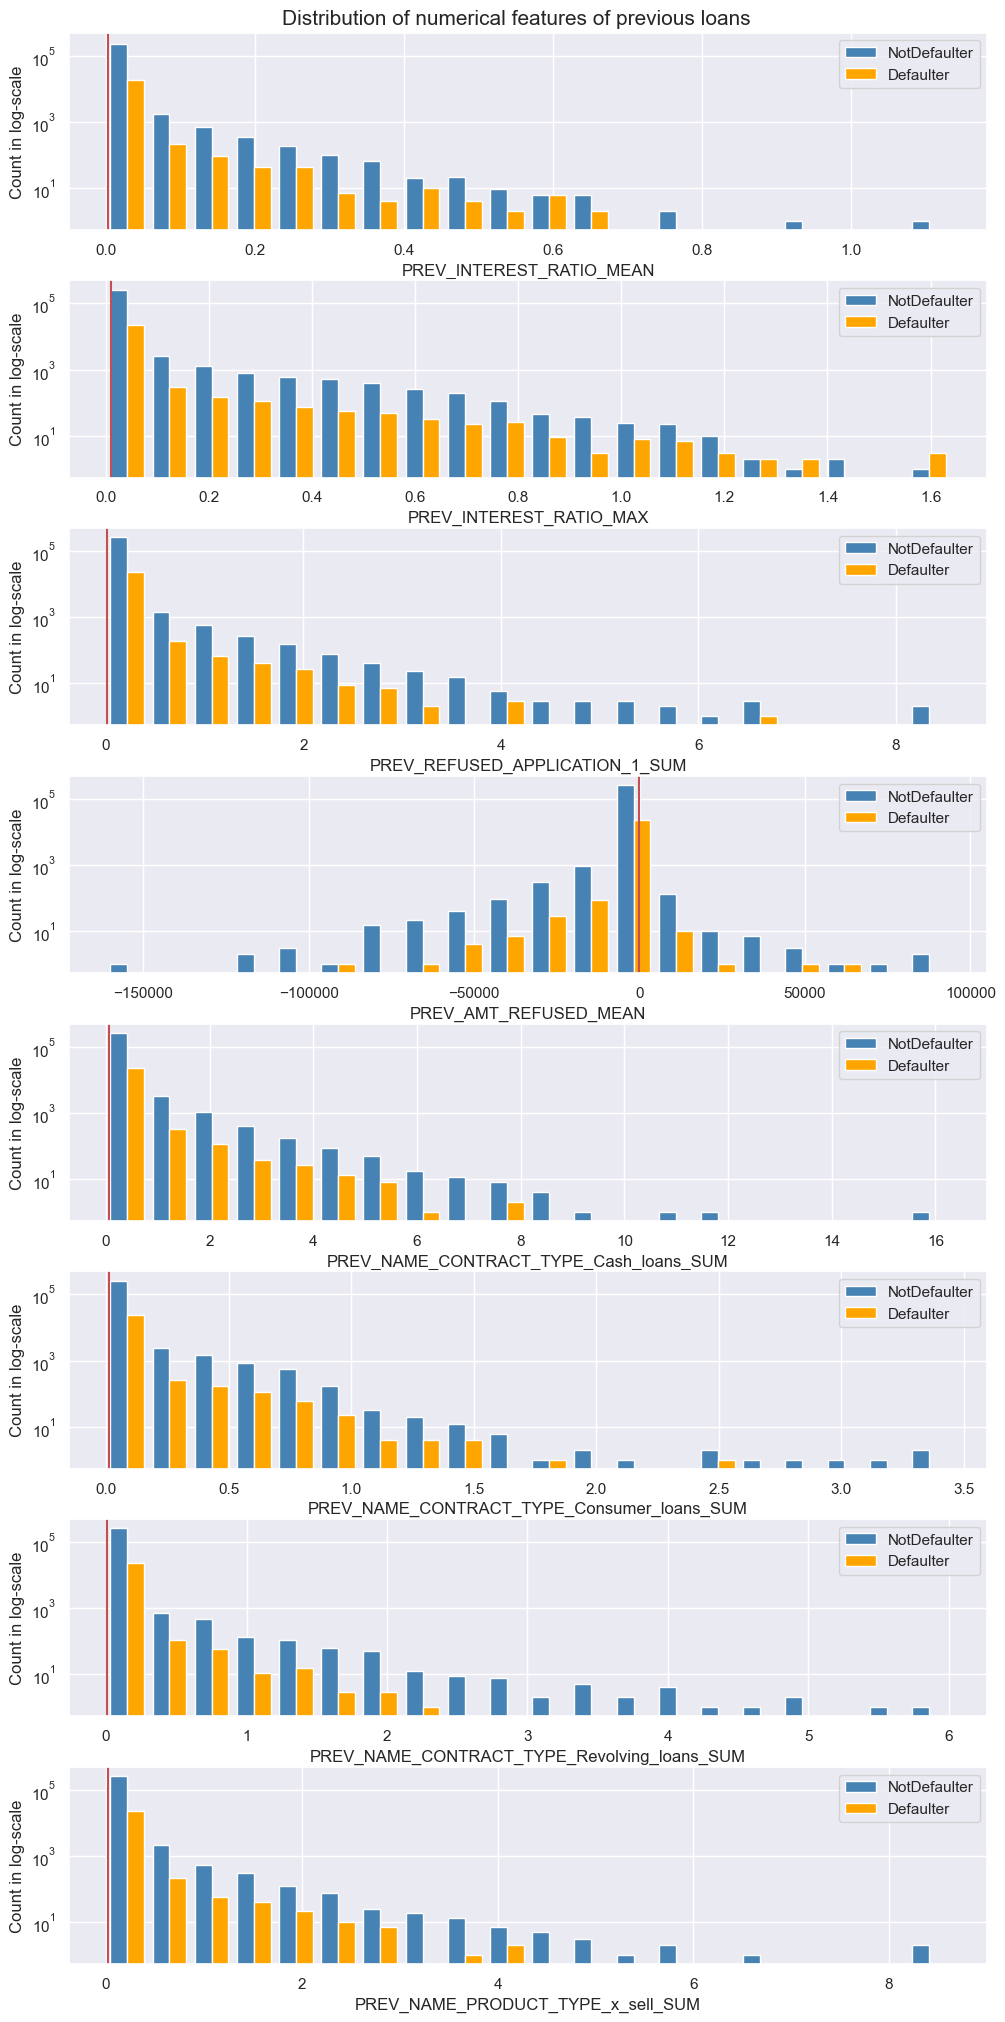

<IPython.core.display.Javascript object>

In [21]:
df = df_eda
features = prev_applications
target = "TARGET"
fig, axis = plt.subplots(len(features), 1, figsize=(10, 20), sharey=True)
plt.tight_layout()
plt.suptitle(
    "Distribution of numerical features of previous loans", fontsize=15, y=1)
for n, col, ax in zip(range(len(features)), features, axis.flatten()):
    if "INTEREST" in col:
        df = df_eda[df_eda[col] > 0]
    else:
        df = df_eda
    fdg1 = df.loc[df[target] == 1, col]
    fdg0 = df.loc[df[target] == 0, col]
    ax.hist(
        [fdg0, fdg1],
        bins=20,
        histtype="bar",
        color=["steelblue", "orange"],
        label=["NotDefaulter", "Defaulter"],
    )
    ax.set_ylabel("Count in log-scale")
    ax.set_yscale("log")
    ax.set_xlabel(col)
    ax.legend()
    ax.axvline(x=np.mean(df[col]), c="r")

There is no clear patterns between the previous application data the default risk. However, there a weak trend that customers that have had multiple refuced applicants were less likely to have payment difficulties. Similar trend can be seen for clients that are classified as returning customers so their *Product_type* is identified as *x-sell*. All in all, clients that had multiple previous loans or applications were less likely to default.

### 2.6 Credit history

Here the impact of the previous loan payment information, and credit history to the target feature is investigated through few selected features.

In [22]:
credit_history = [
    "ACTIVE_AMT_CREDIT_DEBT_RATE_MEAN",
    "BURO_AMT_CREDIT_SUM_OVERDUE_MEAN",
    "ACTIVE_AMT_CREDIT_SUM_OVERDUE_MAX",
    "BURO_AMT_CREDIT_SUM_MEAN",
    "ACTIVE_AMT_CREDIT_SUM_MAX",
    "CC_COUNT",
]

payment_history = [
    "INSTAL_INST_PAYMENT_DIFFERENCE_MEAN",
    "INSTAL_DAYS_PASS_DUE_MAX",
    "INSTAL_DAYS_PASS_DUE_MEAN",
    "INSTAL_DAYS_PASS_DUE_SUM",
]

<IPython.core.display.Javascript object>

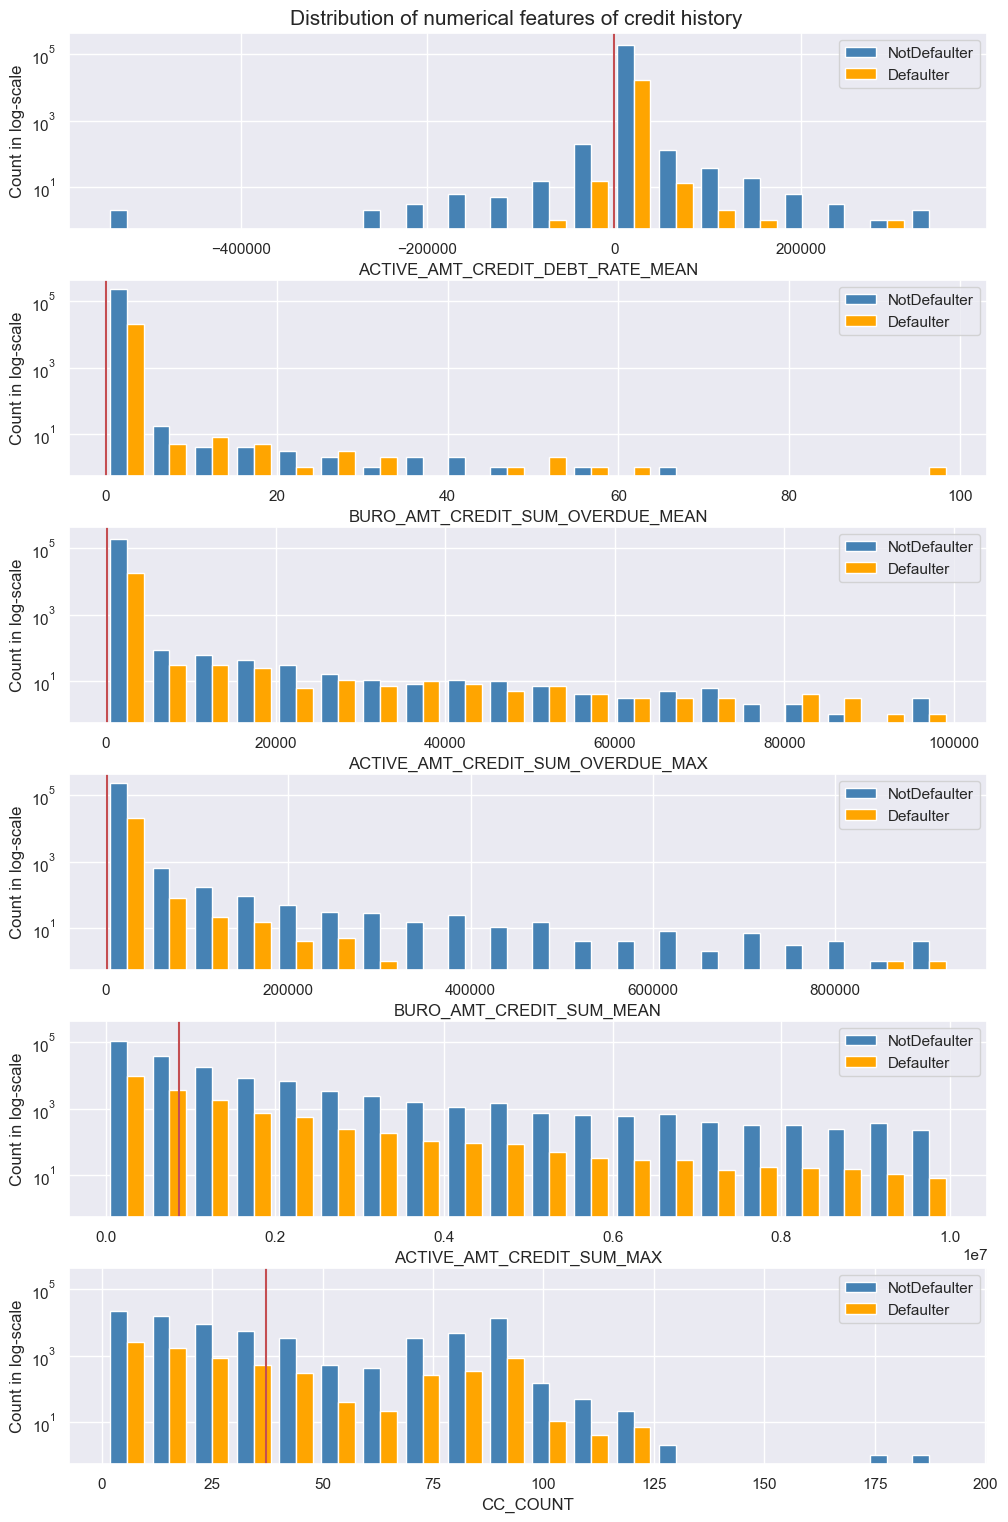

<IPython.core.display.Javascript object>

In [23]:
df = df_eda
features = credit_history
target = "TARGET"
fig, axis = plt.subplots(
    len(features), 1, figsize=(10, 2.5 * len(features)), sharey=True
)
plt.tight_layout()
plt.suptitle(
    "Distribution of numerical features of credit history", fontsize=15, y=1)
for n, col, ax in zip(range(len(features)), features, axis.flatten()):
    if "CREDIT_DEBT" in col:
        df = df_eda[df_eda[col] < 1000000]
        df = df[df[col] > -1000000]
    elif "OVERDUE_MAX" in col:
        df = df_eda[df_eda[col] < 100000]
    elif "OVERDUE_MEAN" in col:
        df = df_eda[df_eda[col] < 100]
    elif "CREDIT_SUM_MEAN" in col:
        df = df_eda[df_eda[col] < 1000000]
    elif "CREDIT_SUM_MAX" in col:
        df = df_eda[df_eda[col] < 10000000]

    else:
        df = df_eda
    fdg1 = df.loc[df[target] == 1, col]
    fdg0 = df.loc[df[target] == 0, col]
    ax.hist(
        [fdg0, fdg1],
        bins=20,
        histtype="bar",
        color=["steelblue", "orange"],
        label=["NotDefaulter", "Defaulter"],
    )
    ax.set_ylabel("Count in log-scale")
    ax.set_yscale("log")
    ax.set_xlabel(col)
    ax.legend()
    ax.axvline(x=np.mean(df[col]), c="r")

The credit history shows that client's mean overall overdue amount and maximum overdue amount from active credits tend to increase risk of payment difficulties. The difference is the most clear when ratios of payment difficulties or not, is compared between clients that do not have any overdue and clients that have. However, majority of the clients do not have past overdue payments.

In addition, it seems that the amount of credit has a negative correlation with the target feature.

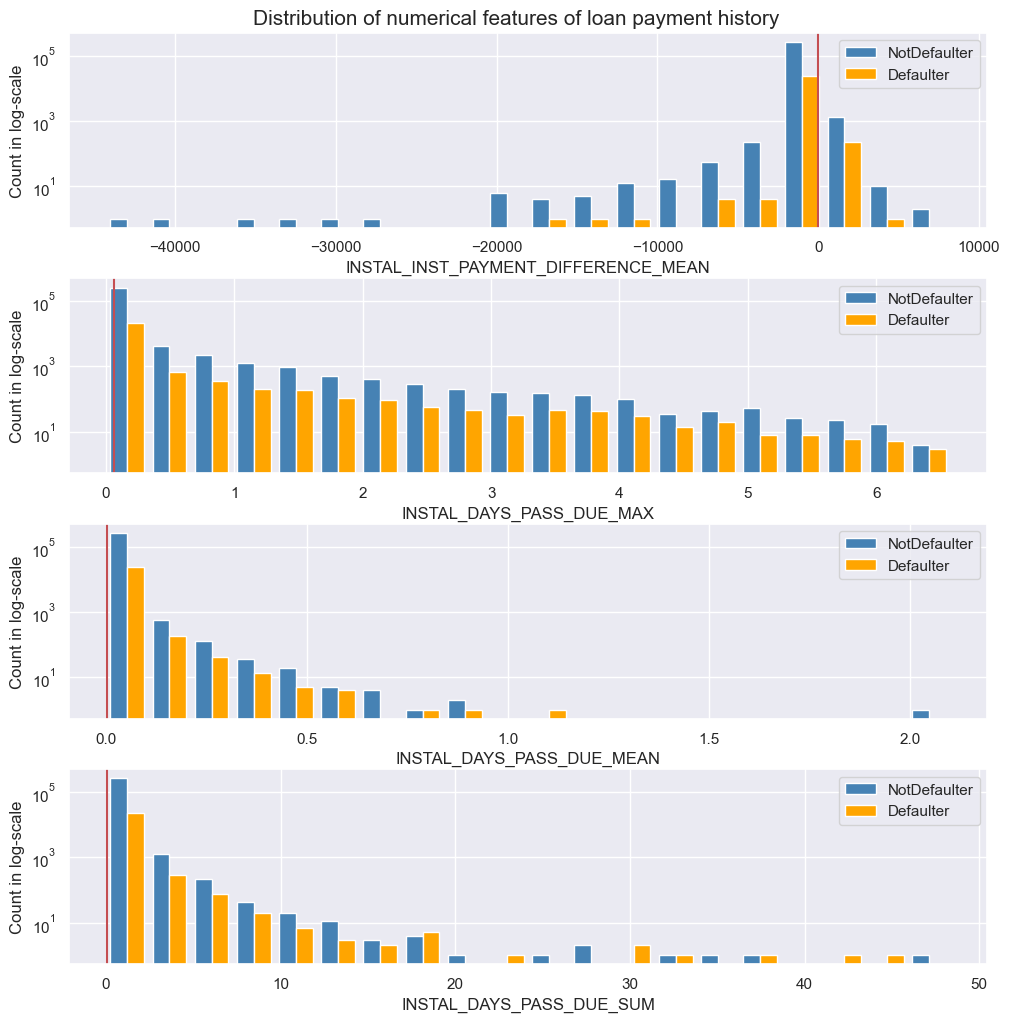

<IPython.core.display.Javascript object>

In [24]:
df = df_eda
features = payment_history
target = "TARGET"
fig, axis = plt.subplots(
    len(features), 1, figsize=(10, 2.5 * len(features)), sharey=True
)
plt.tight_layout()
plt.suptitle(
    "Distribution of numerical features of loan payment history", fontsize=15, y=1
)
for n, col, ax in zip(range(len(features)), features, axis.flatten()):
    fdg1 = df.loc[df[target] == 1, col]
    fdg0 = df.loc[df[target] == 0, col]
    ax.hist(
        [fdg0, fdg1],
        bins=20,
        histtype="bar",
        color=["steelblue", "orange"],
        label=["NotDefaulter", "Defaulter"],
    )
    ax.set_ylabel("Count in log-scale")
    ax.set_yscale("log")
    ax.set_xlabel(col)
    ax.legend()
    ax.axvline(x=np.mean(df[col]), c="r")

The payment history does not reveal any clear correlations against the target feature. There is slight trend that when the sum of days pass due increases over 15 days, the ratio of defaulter increases also significantly.

### 2.7 External sources

Lastly the external data sources are investigated. However, there is no additional information what these features represent.

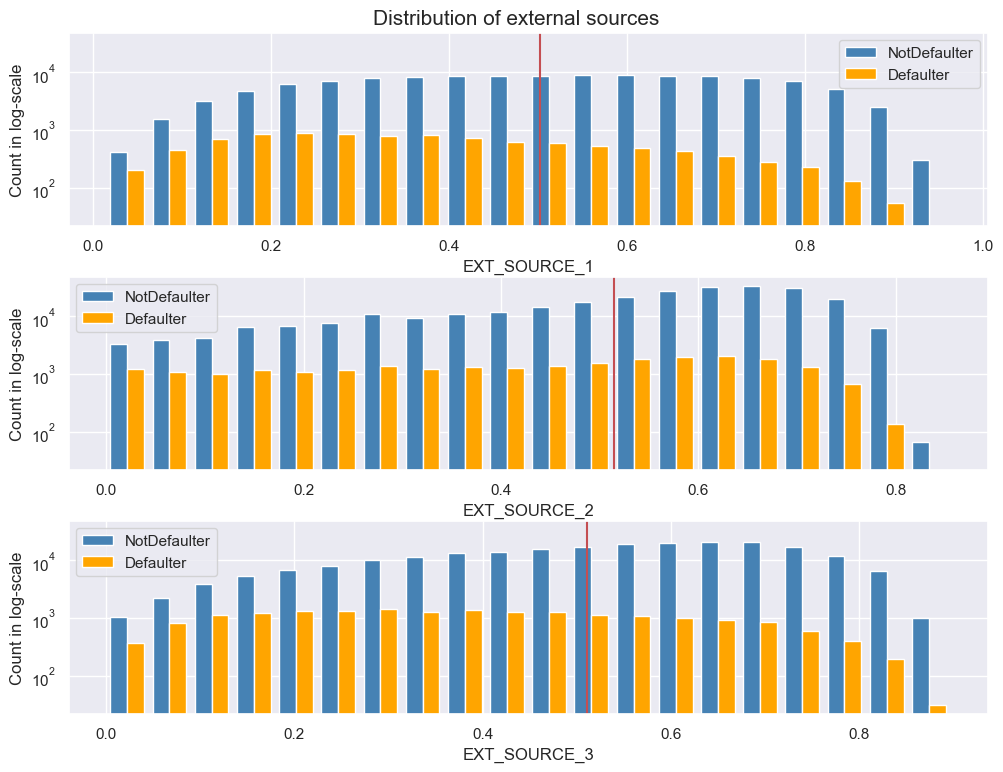

<IPython.core.display.Javascript object>

In [25]:
df = df_eda
features = ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
target = "TARGET"
fig, axis = plt.subplots(
    len(features), 1, figsize=(10, 2.5 * len(features)), sharey=True
)
plt.tight_layout()
plt.suptitle("Distribution of external sources", fontsize=15, y=1)
for n, col, ax in zip(range(len(features)), features, axis.flatten()):
    fdg1 = df.loc[df[target] == 1, col]
    fdg0 = df.loc[df[target] == 0, col]
    ax.hist(
        [fdg0, fdg1],
        bins=20,
        histtype="bar",
        color=["steelblue", "orange"],
        label=["NotDefaulter", "Defaulter"],
    )
    ax.set_ylabel("Count in log-scale")
    ax.set_yscale("log")
    ax.set_xlabel(col)
    ax.legend()
    ax.axvline(x=np.mean(df[col]), c="r")

These distributions show that there is moderate correlation between the external sources and target features. This could be explained if the external source data is for example credit score of the client and the risk of defaulting decreases with higher score.

### 2.8 Correlations

Finally, the correlations between the features are investigated. First a general overview of numerical features is plotted. Then relationship of categorical features is investigated, and lastly the relationship of numerical and categorical features.

In [26]:
df_corr = df_eda[numerical_features].corr()

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Correlation coefficients matrix')

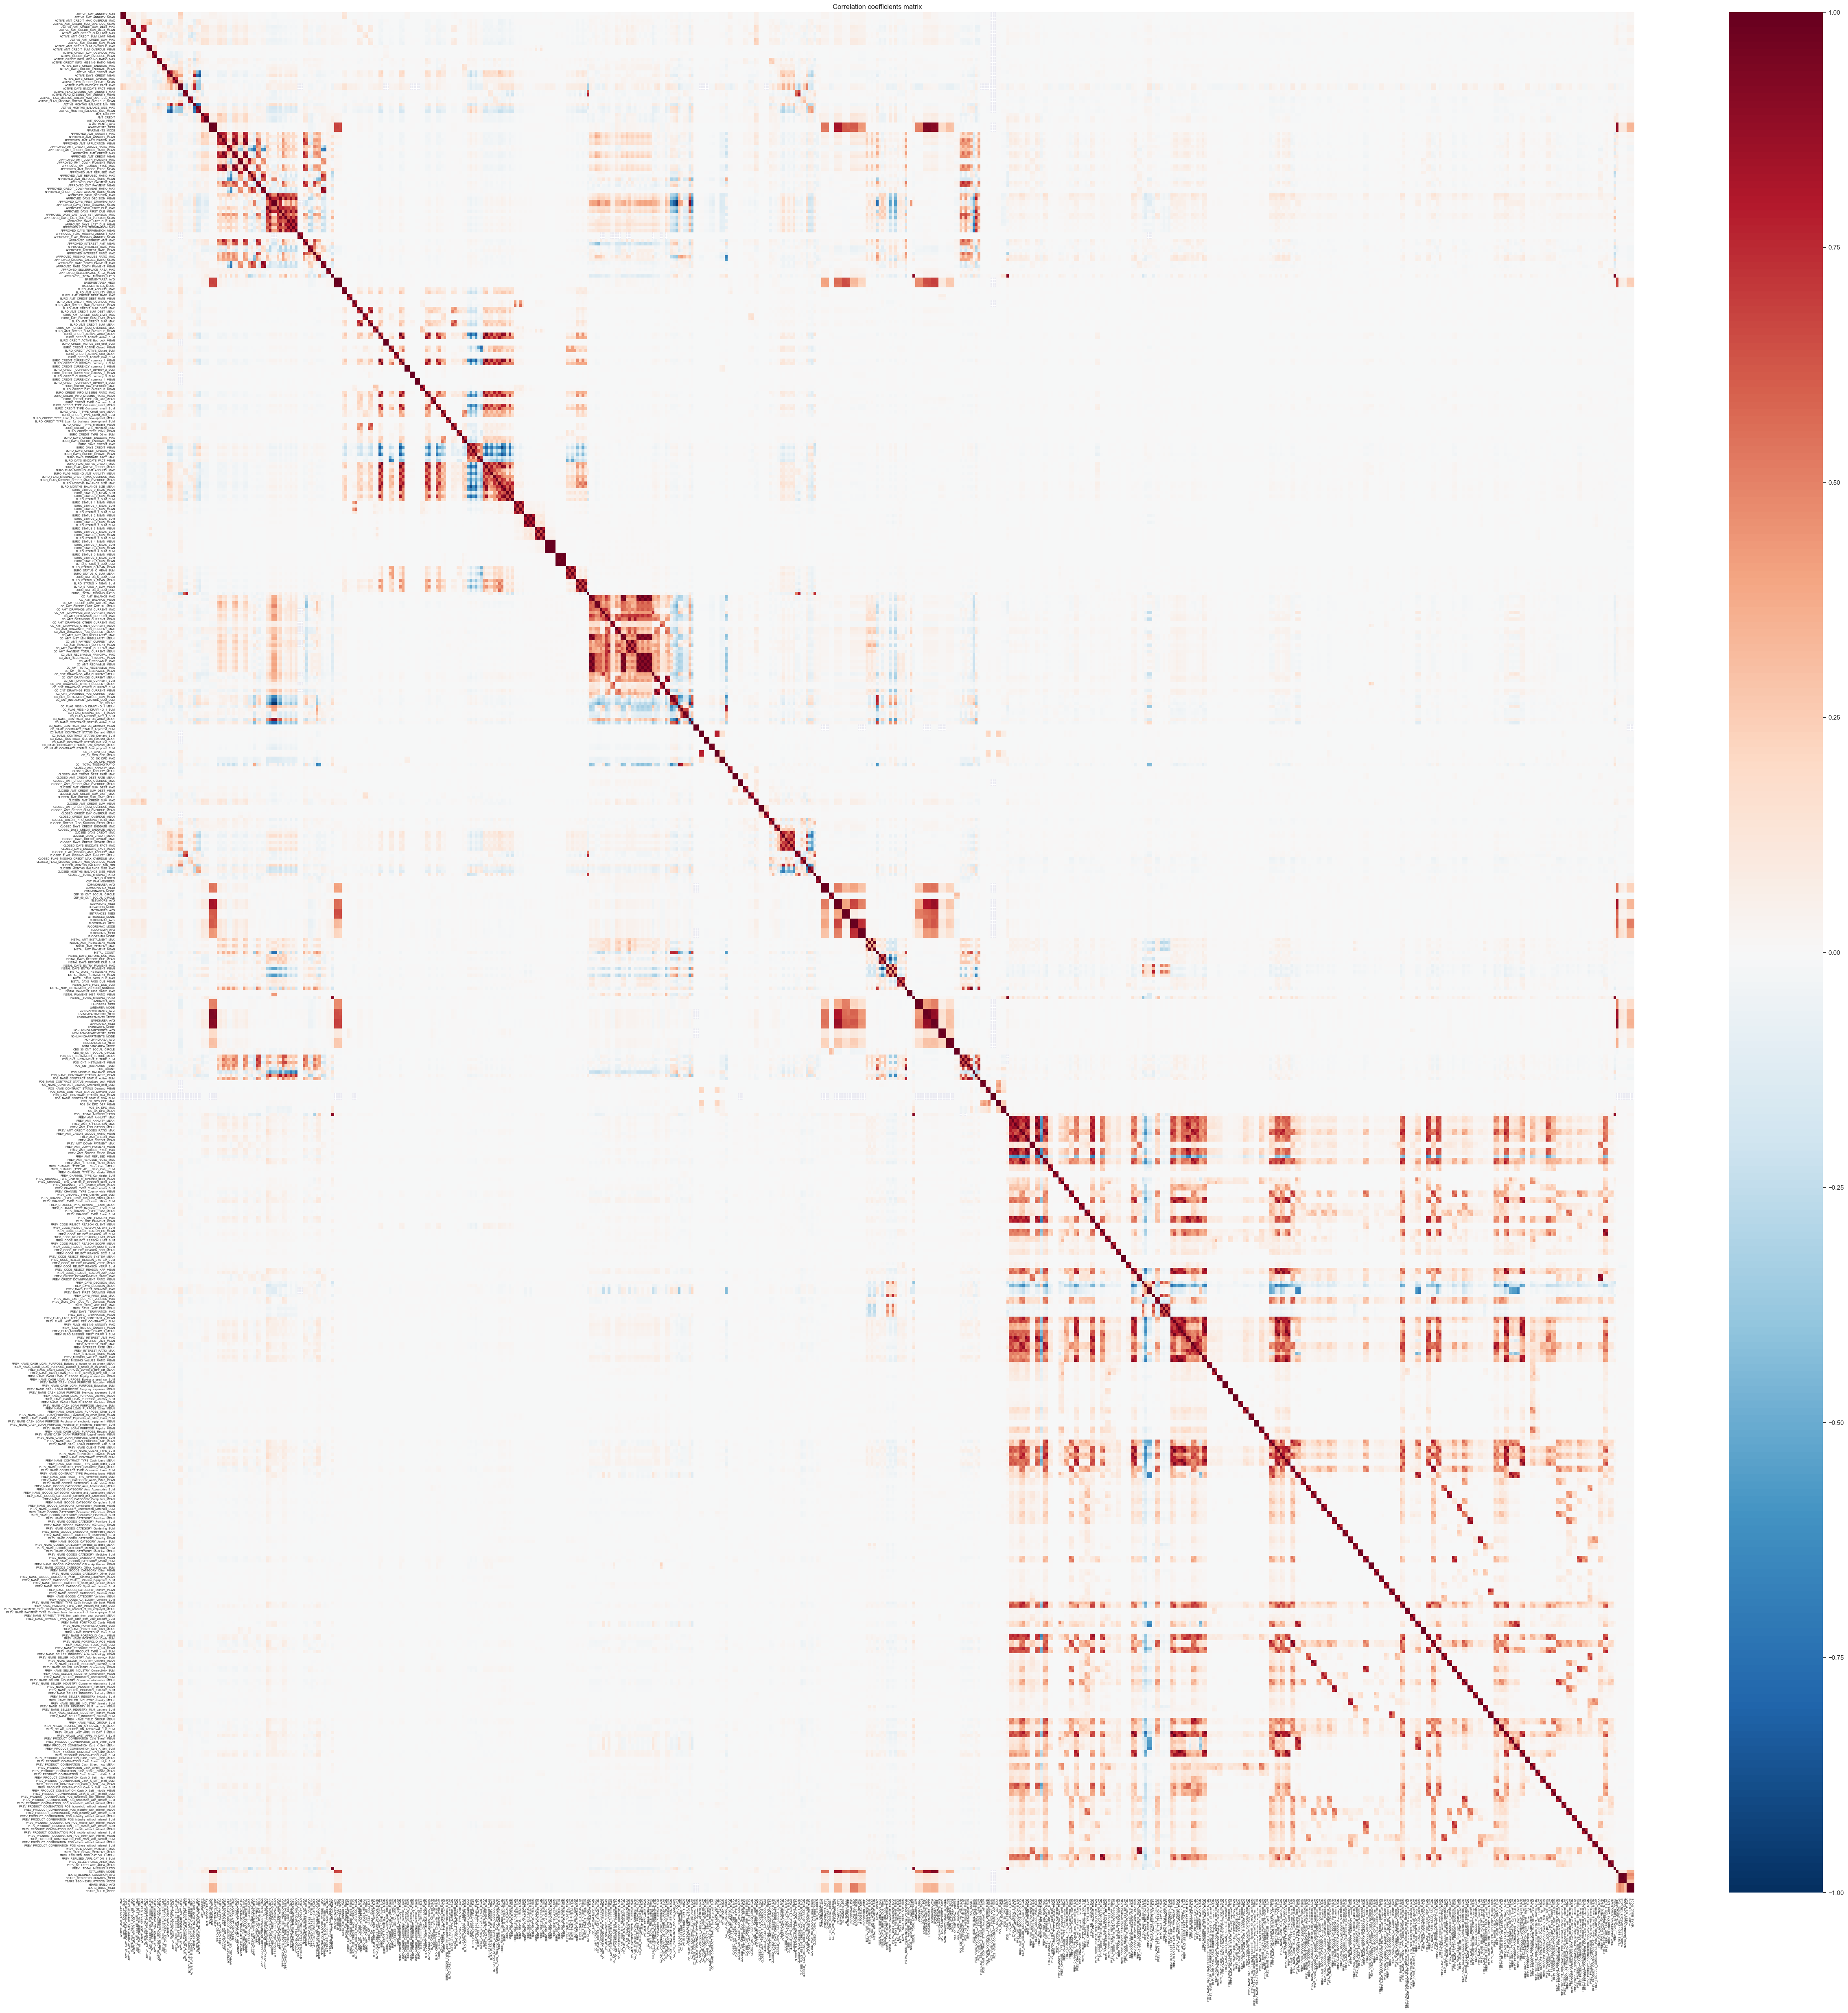

<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots(figsize=(60, 60))
sns.heatmap(
    edatools.absolute_high_pass_filter(df_corr, 0.7),
    cmap="RdBu_r",
    vmin=-1,
    vmax=1,
    ax=ax,
    xticklabels=True,
    yticklabels=True,
)
ax.tick_params(labelsize=5)
plt.title(
    "Correlation coefficients matrix",
)

There are stronger correlations between the features from the same data table or information that is presented in multiple source. For example, the housing information is correlating between each other,family information such as number of kids, family members and applicants age have medium positive correlation. Also External_1 feature has medium negative correlation with applicant's age.

**Chi-square test for independence and Cramér's V test**

Let's use chi-square test for independence and Cramér's V test to determine if there is association between the categorical features. 

First, a chi-square test for independence is conducted for each feature pair. The used assumptions for the tests are:
- The tested variables are independent from each other.
- The categories of each variable are mutually exclusive.
- Dataset is enough large sample.
- Sufficient sample size, the expected count should be at least five in the contingency table. This is tested for each variable pair.


- Null hypothesis: there is no association between the categorical variables
- Alternative hypothesis: there is association between the variables
- significant level = 0.05
- population = Home credit group's loan applicants

Then the Cramér's V test is used to evaluate the strength of the relationship for each variable pair.

In [28]:
categorical_features_with_target = df_eda.columns[
    ~df_eda.columns.isin(
        numerical_features
        + [f"FLAG_DOCUMENT_{x}_1" for x in [9, 11, 13, 14, 15]]
        + ["NAME_HOUSING_TYPE_Co_op_apartment", "NAME_INCOME_TYPE_beneficiary"]
    )
]

<IPython.core.display.Javascript object>

In [29]:
df = df_eda
correlation_matrix, p_matrix = edatools.categorical_correlations(
    df[categorical_features_with_target], categorical_features_with_target
)

<IPython.core.display.Javascript object>

Due to the minimum expected value assumption, the some of the columns and categories are removed from the analysis. Their frequency in the data is significantly smaller than the rest of the categories in the features.

Text(0.5, 1.0, 'Cramérs V test coefficients matrix with chi-square p-values')

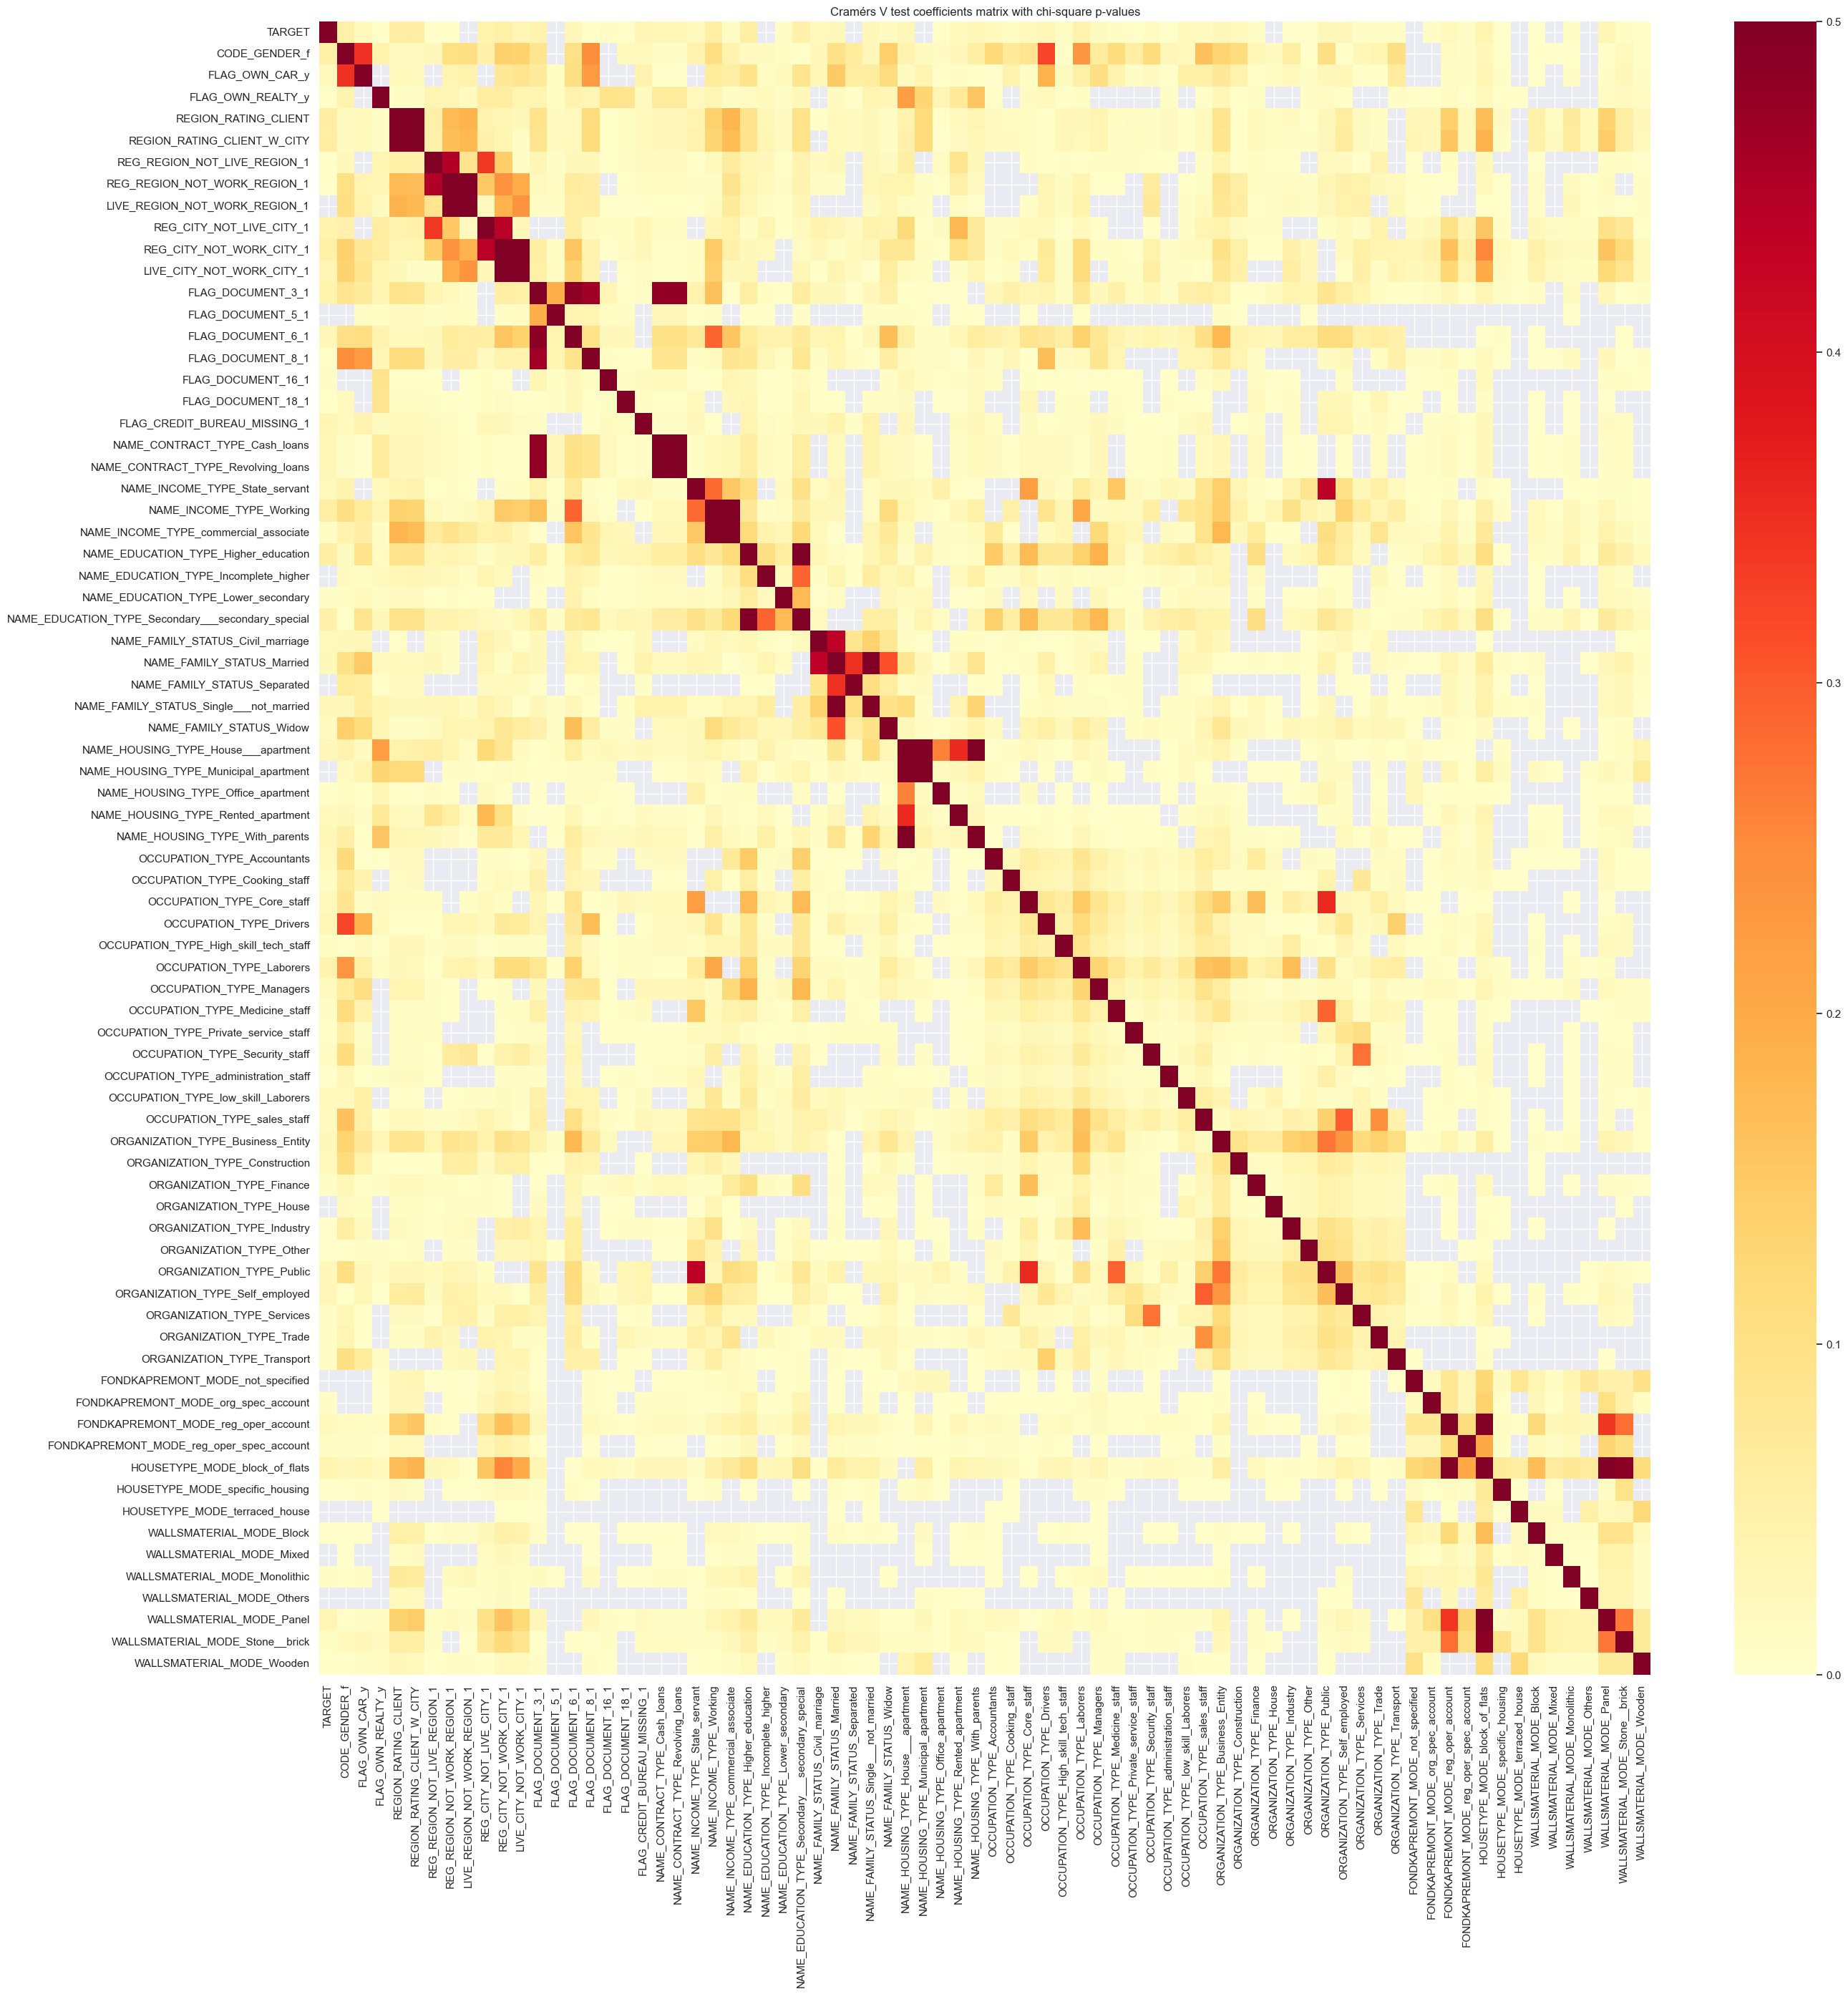

<IPython.core.display.Javascript object>

In [30]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(
    correlation_matrix[(p_matrix < 0.05)],
    vmin=0,
    vmax=0.5,
    square=False,
    cmap="YlOrRd",
    annot=False,
    fmt=".2f",
    ax=ax,
)

plt.title(
    "Cramérs V test coefficients matrix with chi-square p-values",
)

The results are presented for both tests in the figure. Only the feature pairs where the p-value is below 0.05 are presented. This means that for these pairs the null hypothesis of chi-squared test can be rejected, and there is statistically significant association between the features. The presented coefficients in heatmap indicates the strength of relationship between the features based on Cramér's V test. The test result does not give direction of correlation which need to be confirmed through visual investigation.

Based on the chi-squared test we can reject null hypothesis for most of the pairs. The features do not have strong correlations with the target feature. The highest correlations with target feature are gender, education type and region of the client and the rating of the region.

**Kruskal-Wallis test**

Finally, the correlation between categorical and numerical features are investigated. The stregth of correlation is studied using Kruskal-Wallis test. The test statistic measures the the strength of the association between categorical and numerical varables and the p-value indicates the statistical significance of that association. The direction of correlation is not revealed by the test. This can be observed e.g. through visual inspection.

Used assumptions for the test are:
- Variables are independent from each other.
- Continuous variables have similarly shaped distributions across all the groups.
- Subgroups have roughly same size.
- Continuous variables can be treated as ordinal.
- Dataset is enough large sample.

All the assumptions are not met with some of the features and these are removed from the test. Also as the two new ratio features only have 0s and 1s they are classified as categorical features for the test.

In [31]:
columns_to_keep = df_eda.columns[(
    df_eda.isna().sum() / df_eda.shape[0]) < 0.4].tolist()
df = df_eda[columns_to_keep].copy()
df = df.dropna(axis=1)

<IPython.core.display.Javascript object>

In [32]:
df = df_eda.dropna(axis=1)

<IPython.core.display.Javascript object>

In [33]:
assumtions_not_met = [
    "FLAG_DOCUMENT_18_1",
    "HOUSETYPE_MODE_block_of_flats",
    "HOUSETYPE_MODE_specific_housing",
    "HOUSETYPE_MODE_terraced_house",
    "FLAG_OWN_CAR_y",
    "EMERGENCYSTATE_MODE_yes",
    "HOUSING_INFO_MISSING_RATIO",
    "NAME_HOUSING_TYPE_Office_apartment",
    "NAME_HOUSING_TYPE_Co_op_apartment",
    "NAME_EDUCATION_TYPE_Lower_secondary",
    "OCCUPATION_TYPE_administration_staff",
    "OCCUPATION_TYPE_Private_service_staff",
    "WALLSMATERIAL_MODE_Mixed",
    "WALLSMATERIAL_MODE_Monolithic",
    "WALLSMATERIAL_MODE_Others",
    "POS_NAME_CONTRACT_STATUS_Amortized_debt_MEAN",
    "ACTIVE_FLAG_ACTIVE_CREDIT_MEAN",
    "ACTIVE_FLAG_ACTIVE_CREDIT_MEAN",
]
cat_for_kruskal = categorical_features_with_target[
    ~categorical_features_with_target.isin(assumtions_not_met)
]
num_for_kruskal = [
    x for x in numerical_features if x not in assumtions_not_met]
num_for_kruskal = [x for x in num_for_kruskal if x in df.columns]
cat_for_kruskal = [x for x in cat_for_kruskal if x in df.columns]

<IPython.core.display.Javascript object>

In [34]:
effect_size_matrix, p_matrix = edatools.categorical_numerical_correlation(
    df, cat_for_kruskal, num_for_kruskal
)

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'The effect size with Kruskal-Wallis test p-values for pairs with p-value below 0.05')

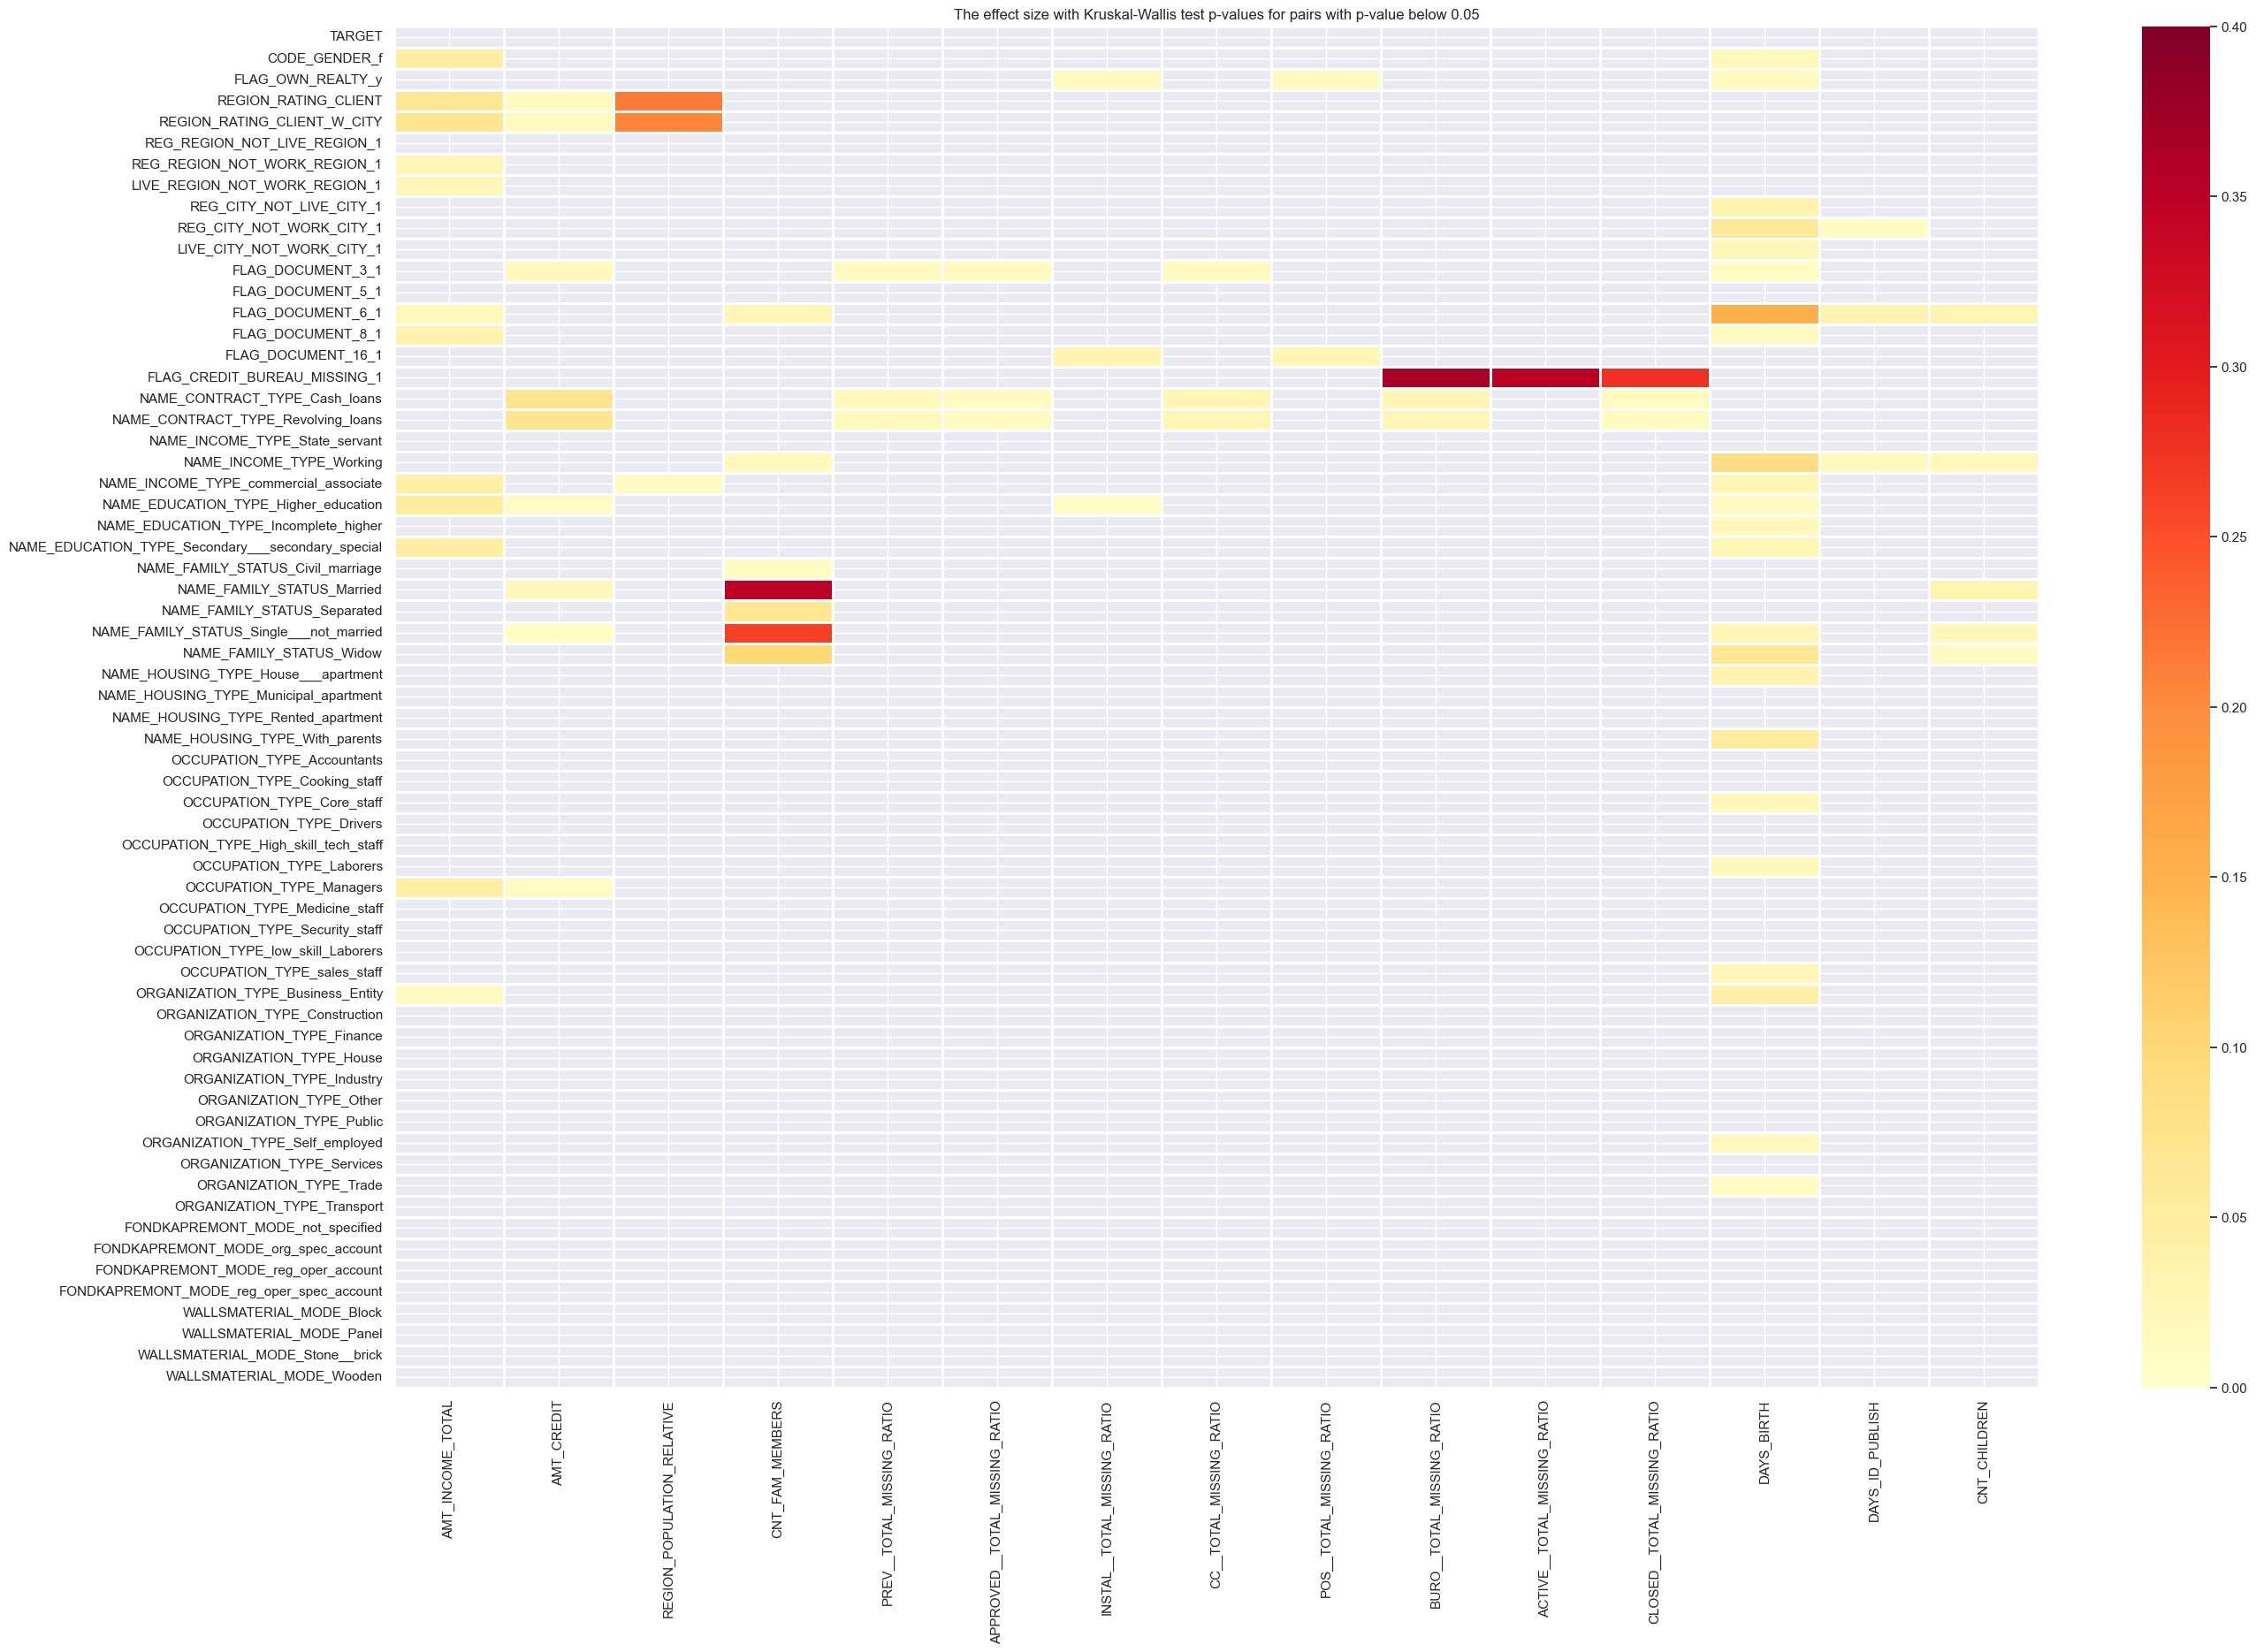

<IPython.core.display.Javascript object>

In [35]:
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(
    effect_size_matrix[(p_matrix < 0.05) & (effect_size_matrix > 0.01)],
    vmin=0,
    vmax=0.4,
    linewidths=1,
    annot=False,
    cmap="YlOrRd",
    fmt=".2f",
    ax=ax,
)

plt.title(
    "The effect size with Kruskal-Wallis test p-values for pairs with p-value below 0.05",
)

The effect size values are ranging between zero to one. In this study, 0.01- < 0.06 is considered as small effect, 0.06 - < 0.14 as moderate effect, and > 0.14 as large effect. The scale is based on eta-squared scale presented in the [reference](https://rpkgs.datanovia.com/rstatix/reference/kruskal_effsize.html).

The results show that features are not correlating with the target feature at all. Some of the feature pairs have stronger connection, such as region rating and region relative population.

All in all, there is no strong correlation between the predictive features and target feature. Some features do exhibit strong correlations with each other, but part of this overlap can be attributed to shared information.

***

## 3. Conclusion

An exploratory data analysis is conducted for Home credit group data dataset.  The main purpose of this analysis is to investigate what factors affect to the default risk of the loan application.

The main research questions are:

- What are suitable target features?
- Is there a pattern in data that can predict the identified target features?
- What are most important features for the predictions?

Based on the exploratory analysis we can conclude that 
- The *TARGET* feature is identified as suitable target feature.
    - Feature determines if the client had payment difficulties at least once.
- There is no clear pattern that can be identified from the dataset as the clients are not homogenous group and diverse significantly from each other.
- The most important factors to predict default risk are
    - external sources (a possible credit score)
    - days employed
    - credit debt ratio
    - active credit sum overdue
    - organisation and occupation type

Next, the models are trained based on the this analysis.

#### Future remarks
- Find better method to visualize correlation matrix
- Use more statistical testing to identify significant differences between groups.